# Association Analysis - 연관 분석

## 공통 코드

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "AssociationAnalysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
#이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

#이미지를 저장할 때 사용하기 위한 함수
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
from matplotlib import font_manager, rc
import platform

#한글 출력을 위한 부분
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

#음수 출력을 위한 부분
mpl.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

#그래픽 출력을 조금 더 고급화하기 위한 라이브러리
import seaborn as sns

#과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수: 0.20 에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 데이터를 분할할 때 동일한 분할을 만들기 위해서
# 모델을 만드는 작업을 여러 번에 걸쳐서 하는 경우 시드가 변경이 되서 훈령용 데이터가
# 자주 변경되면 결국 모든 데이터를 가지고 모델을 생성하는 결과
# Overfit이 될 가능성이 높아짐
np.random.seed(42)

## 네이버 지식인 데이터를 크롤링 해서 단어 추천하기

In [2]:
from bs4 import BeautifulSoup
import urllib
import requests
import time

#크롤링 할 문자열을 저장할 list
textlist = []

#크롤링 할 URL을 생성
target_url = "https://www.donga.com/news/search?query=" + urllib.parse.quote('주식') + "&check_news=92&more=1&sorting=1&search_date=1&v1=&v2=&p="

#10개씩 1000개의 URL 읽기
for n in range(1, 1000, 15):
    url = target_url + str(n)
    try:
        #html 읽어오기
        response = requests.get(url)
        #파싱
        soup = BeautifulSoup(response.text, 'html.parser')
        tmp = soup.select('div.rightList > span.txt > a')
        for line in tmp:
            print(line.getText())
            textlist.append(line.getText())
    except:
        print("예외 발생")
    time.sleep(1)

... 것”이라고 분석했다. 곽 이사는 “과거 삼성전자가 주식시장을 주도한 시기를 살펴보면 필라델피아반도체지수 상승분이 S&P500 지수 상승분을 초과하면서 전문가들이 영업이익을 ...
... 초전도체 바로 아래급”이라는 농담도 나온다.상반기 주식시장 주인공이 ‘빅테크 기업’이었다면 하반기는 ‘비만치료제 기업’이 바통을 이어받았다. 8월부터 시장이 정체된 ...
... 꿈에 불과하다고 비판하는 사람들이 있다. 하지만 주식이나 코인을 해 어느 날 1억 원이 생기는 것, 복권에 당첨돼 10억 원 넘는 돈이 생기는 것, 갑자기 보상금으로 큰돈이 생기는 것 ...
... 있다. 개인투자자가 모인 온라인 종목토론실과 주식 커뮤니티에서도 이전과는 사뭇 다른 분위기가 감지된다. 2차전지 열풍이 정점일 때는 “똘똘 뭉쳐 공매도 세력에 맞서야 ...
... 만료되는 ‘네 마녀의 날’(주가지수 선물·옵션, 개별 주식 선물·옵션 만기일)이다. 통상적으로 미국은 이 파생상품 만료일 이후에 증시 수익률이 상당히 안 좋다. 올해 기준으로는  ...
... 따르면 국민연금공단이 올해 들어 포스코홀딩스 주식 118만 주를 장내 매각하면서 지분율이 지난해 9.11%에서 7.72%로 내려갔다. 포스코그룹 차기 회장 선임 절차가 11월 개시될 예정인 ...
... 담는 이유는 금이 미국달러는 물론, 미국 주식, 한국 주식, 한국 국채, 미국 국채 등 다양한 자산과 낮은 상관관계를 지녀 투자 위험성이 분산되기 때문이다.또 최근 금 수요가 증가한 ...
... 전반에 걸쳐 56억7000만 달러(약 7조5070억 원) 글로벌 주식형펀드 순매도가 발생했는데 이 중 중국에서 유출된 자금이 전체의 약 82%인 45억7000만 달러(약 6조500억 원)인 반면, 한국에서 ...
... 비상장주식 평가 방식이 바뀌었다는 점이나, (비상장주식이) 법령상 재산등록 대상에 포함되도록 변경됐다는 사실을 모르고 있었다”고 설명했다. 9월 중순으로 예정된 이 후보자의 ...
... 2000년부터 이 후보자 처가가 운영

... 6월 28일 기준 4625억 원)을 뛰어넘는 규모다. CGV의 발행 주식 총수는 기존 4772만8538주에서 1억2242만8537주로 1.5배가량 늘어난다. 개인투자자 입장에서는 최근 주가 하락으로 자산가치가 ...
... 5.2% 수익률을 보인 반면, 한국 주식은 12.0%, 중국 주식은 9.1% 상승했다. 만약 미국의 향후 10년 성과가 이처럼 신흥국 대비 낮은 모습을 보인다면 SCHD에 대한 맹목적인 믿음은 배신당할 ...
... 높이인데 이를 적용하면 189달러다.”적절한 애플 주식 매수 가격대는 어느 정도라고 보나.“1차 지지선은 20일선이 위치한 181달러 내외다. 2차 지지선은 5월 저점과 60일선이 위치한 17 ...
... 면을 활용한 메뉴를 선사하고 있다.본사 ‘153패밀리 주식회사’는 외식프랜차이즈, 식품제조, 식품기기, 식품수출·유통 등 다양한 식품 관련 사업을 펼치고 있다. 국내의 해썹(HACCP ...
... 따르면 2분기(4월 3일~6월 20일) 국내 투자자의 일본 주식 매수 건수는 2만1447건, 매수 금액은 4억3631만 달러(약 5614억 원)로 집계됐다. 지난해 4~6월과 비교했을 때 건수(1만5585건)는 37%, ...
... 리움 관장에 이은 우리나라 두 번째 여성 부자로, 보유 주식만 5조9473억 원(5월 19일 리더스인덱스 발표) 상당에 이른다. 돈이 많으니 옷 잘 입는 것쯤이야 당연하다 생각할 수 있지만, ...
... 없지 않나. 실제로 고액 자산가 중에도 1년에 딱 한 번 주식을 싸게 사 비싸게 파는 분들이 있다.”첫 부동산 투자는 내 집 마련으로부동산 투자에 관해서는 어떤 조언을 해주고 싶나 ...
... CFO) 역시 1월 31일 콘퍼런스콜에서 “LG에너지솔루션 주식 매각보다 회사 몸을 가볍게 할 수 있는 자산 효율화를 먼저 추진할 것”이라고 밝혔다.자산 하나씩 파는 LG화학시장에서는 ...
... 하는 골드뱅킹과 금 ETF보다는 비과세 혜택이 있으면서 주식 거래처럼 쉬운 KRX금시장 거래를 추천한다

... 사람이 투자에 나설 때는 그 자산 가격이 좋을 때다. 주식투자만 봐도 주가가 한창 오를 때 투자에 나서지 않나. 금융회사가 추천하는 펀드도 마찬가지인데, 보통은 최근 6개월 혹은  ...
... 무자극 인증을 받았으며 항균 테스트까지 완료했다.주식회사 키포스 관계자는 “비천수 궁은 여성을 위해 더 특별하고 안전하게 만든 제품”이라며 “앞으로 여성의 소중한 Y존 ...
... 원재료의 품질을 관리하고 있다.풀무원식품 주식회사는 이탈리아 파스타 브랜드 Barilla(바릴라)와 협력 관계를 맺고 지난 2019년 7월부터 파스타 면과 소스를 수입하고 있다. 양사 모두 ...
... 맞춘 다양한 단행본 등을 통해 꾸준히 사랑받고 있는 주식회사 키즈스콜레의 유아동 출판사다.최근에는 35만부 판매된 인기 팝업북 ‘미니깜찍팝업북’의 새로운 라인 ‘숫자’를 ...
... 선택을 받은 브랜드를 선정·시상하는 어워드다. 주식회사 청안오가닉스의 종합건강 브랜드 메디타민은 첨가물 없는 건강기능식품을 판매하고 있다. 지난해 기준 메디타민의 마켓 ...
... 브랜드를 선정·시상하는 어워드다. 라임코스메틱은 주식회사 라임의 베이스메이크업 전문 브랜드로, 24시간 지속력의 ‘스킨 핏 롱웨어 커버쿠션’을 최근 출시했다.4년 만에 새롭게 ...
... 브랜드를 선정·시상하는 어워드다.문구는못말려는 주식회사 더블유젯소프트의 무인 문구점 프랜차이즈다. 문구는못말려는 소자본 창업자들의 니즈를 분석해 기존 무인 스토어의 ...
... 주가가 2027년 182만 원이 될 것이라고 예상했다. 하나의 주식을 두고 전혀 다른 평가를 내놓고 있는 것이다. 4월 18~19일 두 사람에게 ‘현 시점 에코프로 매수에 대한 생각’을 묻자 ...
...  그 전에 이미 전 씨에게 증여됐던 웨어밸리 비상장 주식을 아버지의 지시로 새어머니에게 양도했다고도 했다.전 씨는 아마 자신이 가족 구성원이 맞을까 의문이 들었을 것이다. ...
... 4월 3일부터 19일까지 개인투자자는 포스코홀딩스 주식을 3조 원어치 순매

... 수 있다. 덧붙여 스탠 와인스타인(Stan Weinstein)이 쓴 ‘주식투자 최적의 타이밍을 잡는 법’. 이 두 권이 앞서 말한 트레이더들에게 이론적 기반을 제공한 책들이다. US 인베스팅 ...
... 예단할 수 없다. 금리 말고도 환율이나 채권시장, 주식시장 안정세가 이어져야 여기에 후행하는 부동산시장도 안정세를 찾을 수 있다. 적어도 6개월에서 1년은 시간이 지나야 선행 ...
... 금리인하를 언급하지 않지만 디스인플레이션 발언에 주식시장이 환호한 것이다.”그렇다면 미국 물가는 언제 2%대로 떨어질까.“연준은 내년, 월가는 올해로 괴리가 있다. 현재 ...
... 혼자만의 시간을 즐긴다. 사회성엔 문제가 있지만 주식시장을 꿰뚫어보는 안목은 탁월하다. 그러던 어느 날 그의 눈에 무언가 감지된다. 그는 며칠 동안 꼼짝도 하지 않은 채 MBS ...
... 비교하면 후자의 경우 세금이 낮아집니다. 또 부동산, 주식 등 향후 미래가치가 높아지는 게 확실한 경우라면 상속보다는 증여를 택해야 세금을 줄일 수 있습니다.#왕현정 #KB증권  ...
... 타고 형성된 전 세계적 주식 호황 한가운데서, 중국 주식시장은 폭락을 거듭했다. 민간기업들이 하루아침에 규제와 제재의 대상이 되는 불확실성과 반(反)시장 조치들을 목도한 중국 ...
... 사이 기준금리가 급상승하면서 예금금리는 올라가고 주식시장은 하락세입니다. 투자는 저렴할 때 사서 비쌀 때 파는 것입니다. 3~5년 후를 바라보고 성장 가능성이 높은 펀드에 매달 ...
... 생기고, 대주주의 지배력이 커지는 효과가 생긴다. 주식 가치가 희석됨은 당연하다. 인적분할을 공시한 기업 가운데 자사주 비율이 높은 대한제강(24.7%), 현대백화점(6.6%), 동국제강(4. ...
... 제약을 받았다. 투자처에 제약이 생기고, 사고 싶었던 주식도 충분히 못 사게 되는 일이 생겼다. 흥미가 점점 떨어지더라. 지금이야 한국에 상장기업이 증가하고 있지만 2010년대만 ...
...  엔비디아 주가는 1월 들어 30% 

... 것”으로 전망했다.박상현 하이투자증권 연구원은 “주식시장이 FOMC 결과를 부정적으로 받아들인 것은 미국의 최종 기준금리 수준이 이전보다 높아질 수 있고, 금리인상 종료 시점이 ...
... 기존 자본시장에 견줘도 될 만큼 상당히 성장했다. 주식시장을 예로 들면 자본시장법에 따라 미공개 주요 정보의 이용, 시세 조종 등 불법 행위를 예방하고 처벌하는 시스템이 갖춰져 ...
...  강호성 CJ ENM 엔터테인먼트 부문 대표를 임명했다. CJ주식회사는 기존 김홍기 대표가 경영대표를, 신임 강호성 대표가 대외협력 중심 경영지원대표를 맡는 2인 대표체제로 전환된다. ...
... 집을 산 ‘영끌족(최대한의 대출을 받아 집을 사거나 주식 등에 투자한 사람)’에 젊은 층이 많다는 의미로 풀이된다. 박정하 의원은 “문재인 정부 때 2030세대의 영끌 투자가 수치로 ...
... 소식까지 이어졌다. 이 약관에는 ‘현대카드 주식회사가 가입 고객에게 제공하는 애플페이 결제서비스’라는 내용이 담겼다. 또 ‘본 약관은 2022년 11월 30일부터 시행합니다’라며 ...
... 월배당 ETF로 안정적인 현금 흐름 확보월배당 ETF는 주식·채권 등 편입 자산에서 나오는 이자와 배당을 모아 월간 단위로 분배하는 구조다. 이 같은 배당 수익을 통해 변동성 장세를 ...
... 높다. 경기는 내년 상반기에 더 침체될 가능성이 크다. 주식과 부동산 등 자산 가격이 큰 폭으로 떨어질 가능성이 높은 것이다.과거 미국의 금리인상 사례를 보면 연준이 단기간에 3 ...
... 생존 가능한 한국 기업 중 하나가 삼성전자다. 이미 주식을 보유하고 있다면 당분간 버티는 것이 좋다.”*유튜브와 포털에서 각각 ‘매거진동아’와 ‘투벤저스’를 검색해 ...
... 중 어떤 게 낫냐는 질문도 많이 받았다고요. 예금과 주식투자 둘 다 포기할 수 없다면 어떤 방법이 최선일까요.“이때도 앞서 말한 오류를 범하는 분이 많아요. 단기채 ETF의 과거 ...
... 것이다. 재벌 개념과 근본적으로 충돌하는 건 주식

... 필요합니다. 투자 공부를 해 확신이 서면 나중에라도 주식투자에 접근해보길 바랍니다.기존에 가입한 보험 중 불필요하거나 보장 혜택이 적은 상품, 갱신형 특약은 보험 리모델링을 ...
... 2008년 10월, 2018년 10월, 2020년 3월). 6월 30일 기준 한국 주식시장에서 켄 피셔의 전략에 따라 도출한 종목 20개는 다음과 같다.강환국2021년 7월 직장인 투자자에서 ‘30대 파이어족’으로 ...
... 나올지 잘 살펴봐야 한다. 서두에 말했듯이 계속 주식 차트를 살펴보면서 주도주를 파악해야 한다.”어떤 방식으로 투자해야 할까.“포트폴리오에 주도주가 포함돼 있지 않으면 ...
...  할아버지로부터 드라마의 막이 오른다.‘현대자동차주식회사.’ 1967년 12월 쉰두 살의 정주영 현대그룹 창업자가 자본금 1억 원을 갖고 회사를 세웠다. 정주영은 이미 1946년 4월 ...
... 급등하는 것이다.‘무상증자 테마’로 인해 유튜브와 주식 오픈채팅방 등 SNS(소셜네트워크서비스)에는 ‘무상증자로 돈 버는 법’ ‘무상증자 유망주 추천’ 등 테마주 투자를 ...
... 농화학과에 입학했다. 졸업 후 미원그룹(현 대상주식회사), 삼성건설, 두산엔지니어링 등에서 근무하다가 1994년 수원환경운동센터를 설립하면서 환경운동에 뛰어 들었다. 녹색연합 ...
... LKB&)파트너스는 함춘승 사장을 심문하던 중 ‘주식매매계약서 별도 합의서’라는 문서를 공개했다.이 합의서에는 오너 일가에 대한 예우와 관련한 내용과 함께 한앤코가 남양유업을 ...
... 어느 정도로 잡아야 하나.“약세장에서는 상승장처럼 주식을 지속적으로 보유하고 있다고 수익이 나지 않는다. 더군다나 단기 이슈에 움직이는 소형주는 지속적으로 주가가 ...
... 혜택이 적은 보험은 재설계하길 바랍니다.변액연금은 주식과 채권의 투자수익에 따라 적립평가금이 변동되는 상품으로 10년 이상 바라보고 투자해야 합니다. 변액연금을 꼭 ...
... 명중시키는 확률과 비교하는 실험을 했다. 경제, 주식, 선거, 전

... 중 절반에 달했다. 해외 금융권은 이미 가상자산을 주식, 채권 같은 자산군으로 보고 비트코인과 이더리움 중심으로 파생상품을 선보이고 있다. 대표적으로 CME는 비트코인, 이더리움 ...
... 수 있게 해주는 서비스다. 한국, 미국, 중국, 일본 주식을 다룬다.”자산 20억 원을 일궜다. 경제적 자유를 얻었다고 생각하나.“경제적 자유란 경제적인 상황으로부터 자유로워진다는 ...
... 경쟁력 약화, 그로 인한 전반적인 경제 펀더멘털 둔화, 주식시장 부진 우려는 과도한 것으로 보인다. 더 나아가 엔화 환율 변동이 무역 경로를 통해 국내 경제에 미치는 파급 효과는 ...
... 강조했다.박경서 교수는 다음과 같이 분석했다.“한국 주식시장은 비슷한 다른 아시아권 국가의 그것에 비해 유난히 저평가받는다. 이른바 ‘코리아 디스카운트’다. 주원인은 ...
... 가능성이 거의 없는 우량 회사채를 추천한다. 채권도 주식과 마찬가지로 상장돼 있어 증권계좌를 통해 1만 원부터 자유롭게 사고팔 수 있다.”최근 저성장-고령화를 이유로 ‘제2의 ...
... “국내 반도체 기업은 130개가 넘는다. 매달 100만 원씩 주식을 매수해 5년 이상 장기투자하는 투자자라면 소재 기업을 추천한다. 반도체 성능이 올라가면 제조 공정이 더 복잡해지고 ...
... 베스트셀러 1위부터 10위까지 모두 ‘부자 되는 법’ ‘주식 성공하는 법’ ‘비트코인 투자’ 등의 책이 휩쓸었다. 사람들이 미래를 불안하게 여겼기 때문이다. 이땐 ‘어떻게든 ...
... 것을 알 수 있다. 또 다른 주식 하락기인 2000년 2월 주식은 시기별로 -9%, -7%, -16% 손실을 보였지만 4개 자산에 분산투자한 경우 손실 없이 모든 경우에 수익이 발생했다.지금까지 분석을 ...
... 복귀론에 힘을 싣는다. 지난해 7월 권 창업주는 교촌 주식 97만4369주(3.9%)를 처분했다. 4월 1일 종가 기준 약 195억 원 규모다. 이 중 2만4062주가 일가친척에게 증여됐다. 권 창업주 외에 ...
... 지적이 

... 않다. 당시에는 한국을 비롯한 많은 나라에 주식시장 자체가 없었다. 또한 일반인이 미국국채에 투자하기도 어려웠다. 특히 대공황이 발생한 후 미국 정부가 금을 상납하게 하고 금 ...
... 주식 보유 목적을 변경했다. 약 한 달 후엔 주식 비중을 4.36%로 더 낮췄다.김우찬 교수는 “소액주주들이 경영진을 통제하기는 어렵다. 소액주주들은 필히 연대해야 하는데, 이 ...
... 사건이 이어졌다. 윤 후보는 개인투자자가 경제성장과 주식시장 발전의 성과를 누리게 하고자 관련 법규를 정비할 방침이다. 주가 하락이 과도할 경우 자동으로 공매도가 금지되는 ...
... 000선 아래에서 횡보하며 박스권 증시가 이어지자 그간 주식이나 암호화폐 투자 열기로 시들했던 은행 예적금 상품에 대한 관심이 커지고 있다. 무작정 투자에 뛰어들었다 원금마저 ...
... 후원금을 걷어줬다. 횟집 한다고 하니 군산시민들이 주식회사를 만들어 도왔다. 내 삶은 빚쟁이 인생이다. 받은 은혜를 다 돌려주고 죽는 게 나의 꿈이다.”그 수단이 정치였던 건가 ...
... 한국 주식시장에서 물량을 더 늘릴 수 없게 되면 미국주식으로 진출할 계획이다.”*유튜브와 포털에서 각각 ‘매거진동아’와 ‘투벤저스’를 검색해 팔로잉하시면 기사 외에도 ...
... 있을 거라고 생각해요. 그분들에게 ‘지금이라도 주식시장의 흐름을 공부하고 다시 기회가 오면 용기 있게 잡으면 된다’는 말을 꼭 해주고 싶어요.” ...
... 상장 한 달 만에 시간 외 대량매매(블록딜) 방식으로 주식을 대량 매각하면서 소액주주에게 피해를 주는 결과를 낳았다.스톡옵션은 회사 성장에 기여한 임원진에게 부여하는 성과 ...
... 마우리치오뿐이었다. 로돌프가 사망하자 로돌프의 주식은 외아들 마우리치오에게 모두 돌아가 마우리치오가 최대주주로 등극한다. 여기에 알도의 둘째 아들 파올로는 ‘파올로 ...
... 부탁은 단호하게 거절하고 자신에게만 집중해보자. 주식 · 코인 투자는 꿈도 꾸지 마라. 63년생 인생 너무 어렵게 살지 말고 단순

...  이 때문에 좀 더 장기적 관점에서 지금이 23앤드미 주식을 저렴하게 살 수 있는 기회라고 보는 투자자도 있다.한편 DNA 검사 및 분석 사업은 필연적으로 개인정보 보호 이슈를 부른다. ...
... 커가기 시작하면서 뉴욕 월스트리트를 중심으로 주식투자 붐이 일었다. 이런 영향이 전 세계로 퍼져나가면서 산업이 발달했고, 돈을 번 이들을 중심으로 부동산도 많이 갖게 됐다 ...
... 악화 때문임을 알 수 있다. 이제 다음 시간에는 유럽 주식시장이 어떻게 이런 수렁에 빠져들게 됐는지 그 배경을 살펴보자.*유튜브와 포털에서 각각 ‘매거진동아’와 ...
... 단기적으로는 결코 예측할 수 없다는 의미에서 주식시장을 ‘미스터 마켓’에 비유했다.162만 구독자를 보유한 경제 유튜브 채널 ‘삼프로TV’와 함께하는 이 책의 저자이자 ...
... 만회했더라.“이 후보가 증권거래소에 갔을 때 주식시장에 대한 높은 이해도를 보여주기도 했고, NFT(Non-Fungible Token·대체불가능토큰)에 대해서도 긍정적 발언을 내놓다 보니 20~3 ...
... 본다.”자산이 집만 있는 건 아니다. 현금, 토지, 주식 등 다양한 형태로 존재한다. 그런데 우리나라는 유독 주택에 대한 세부담이 과중하다. 박 교수는 이 점을 들어 “조세평등의 ...
... 만큼 매수 시점이 중요하다. 배당락일에 임박해 주식을 사들이면 배당수익률보다 배당락 이후 주가 하락 폭이 커질 수 있다. 따라서 배당주의 경우 주가가 배당수익률 이상으로 ...
... 통해 지주사 전환 안건을 상정할 예정이다. 발행 주식 총수의 3분의 1 이상, 출석 주주 3분의 2 이상이 동의한다면 최 회장의 의지는 관철될 수 있다.사진 동아DB  ...
... 실력을 빠르게 키울 수 있는 공부법을 알려주세요.“주식 공부를 위해 책과 강의에 수백만 원은 쓴 거 같아요. 독학으로 실력을 빠르게 키우려면 다양한 기업을 집중적으로 학습하는 ...
... 봉쇄 조치 가능성은 희박하다. 앞으로 경제와 주식시장은 감염병 영향권에 깊게 

... 나온다. 나머지 반은 배당수익으로 채울 수 있다. 주식시장이 나쁠 때도 배당을 통해 수익을 올릴 수 있다는 것이 장점이다. 미국 소비재기업 킴벌리클라크와 같이 친숙한 기업들로 ...
... 호에서 한국 주식시장이 세계 최저 수준의 배당 성향을 기록하는 이유를 살펴봤다. 핵심은 ‘기업이익 변동성’이었다. 이익 변화를 예측하기가 워낙 어렵다 보니, 이익을 최대한 ...
... 주식을 팔아 달러를 사고, 달러가 오를 때 달러를 팔아 주식을 사는 행위를 반복하다 보면 ‘돈이 일하게 하라’는 조언을 누구보다 잘 실천할 수 있다고 저자는 말한다. ...
... 오해를 살 만한 행동은 피하자. 18 · 30일 재물운 상승. 주식은 팔고 로또는 사자.개띠베개 방향 남쪽 · 서쪽 행운 소품 다육식물 · 시집용기를 가지고 마음에 걸리는 지난날의 잘못을 ...
... ‘어펌(Affirm)’의 주가가 40% 가까이 폭등했다. 금요일 주식시장 마감 후 진행된 시간외거래에서 주가가 갑자기 튄 것이다.이 시각 발표된 어펌과 아마존의 협력 소식이 주가를 ...
... 악재다. 최근 상당수 중국 빅테크 기업이 글로벌 주요 주식시장에 상장했다. 투자자들은 당장 손실을 만회하고자 투자 포트폴리오를 조정할 수밖에 없다. 이미 일본 ...
... 유리한 투자 방식을 택할 필요가 있다. 특정 기업보다 주식시장을 가져가는 것이 덜 위험하다. 기업의 장기 성장보다 시장의 장기 성장 가능성이 높다. 집중투자보다 분산투자가 손실 ...
... 노력을 다른 곳에 투입하는 게 맞으니까요. 일례로 주식 대신 ETF, 펀드 같은 간접 상품에 분산 투자해 자금을 굴릴 수도 있어요. 또 투자 공부보다는, 그림 실력이 뛰어나다면 이를 ...
... 시간 한국 주식시장이 위아래로 급등락하는 이유 중 하나로 ‘낮은 배당수익률’을 지목한 바 있다. 이에 대해 다음과 같은 의문을 제기하는 독자가 적잖았다.“예전에는 한국 ...
... 종목도 떠올랐다. 계좌를 만들고 일주일가량 낮밤으로 주식창을 들여다보며 고민 또 고민

... 유입되면 고가에 팔아치우고 나가버린다”고 말했다.주식시장에서는 자전거래가 사실상 불가능하다. 금융 당국이 이런 거래를 즉각 파악해 잡아내고 처벌하기 때문이다. 그러나 ...
... 따르면, 1분기 기준 국내 ESG 펀드는 총 89개. 이 중 국내 주식형으로 운용되는 펀드 42개의 1분기 수익률은 7.71%로 코스피200의 1분기 수익률 6.68%보다 1.03%포인트 높았다.한국에서도 ESG ...
... 39달러를 기록했다. 미국 최대 온라인 커뮤니티 레딧의 주식 게시판 월스트리트베츠(wallstreetbets)에 즐겨 거론되면서 상장가 대비 5배 이상 오른 것이다. 이후 주가가 빠져 현재 25달러 ...
... 보인다는 말이 있잖아요. 이 분야가 더더욱 그래요. 주식투자를 할 때도 리딩방에 들어가기 위해 돈을 내고, 일부의 사람만 알고 있다는 정보를 좇는 게 아니라 스스로 책을 많이 읽고 ...
... 이사 계획이 없다.”암호화폐 투자는 왜 안 하나.“주식투자를 해보니 내가 게으른 사람이라는 걸 알게 됐다. 암호화폐는 24시간 부지런히 장을 보고 있어야 한다. 게으른 자에게 맞지 ...
... 부장은 작고한 신춘호 명예회장으로부터 5월 말 농심 주식 20만 주(600억 원 상당)를 상속받으며 지분 3.29%를 확보했다. 농심 지분 보유는 이번이 처음으로 상속세로만 350억 원을 내야 ...
... Limit on close: 종가 기준 매수)를 미리 예약해둔다. 매일 주식창을 보고 있지 않아도 된다는 얘기다. LOC 매수 지점은 밸류 최솟값을 현재 보유하고 있는 TQQQ 개수로 나눈 값이 기준이 ...
... , 이니스프리(18.18%), 에스쁘아(19.52%) 등 서 씨가 보유한 주식 평가액은 2천1백억원에 이르지만 약 1조원으로 추정되는 승계 재원 마련엔 한참 부족한 실정이다.배당, 상장, 매각 등을 ...
... 일괄로 20%만 부과되므로 다른 소득이 많은 경우 해외주식에 투자하는 게 세금 측면에서 유리할 수도 있습니다.윤나겸은… 세무 전문 채널

... 시작됐다. 그런데 ‘왜 내 주식만 떨어지지?’ 주식 접고 비트코인을 시작해야 하나.*포털에서 ‘투벤저스’를 검색해 포스트를 팔로잉하시면 다채로운 투자 정보를 만나보실 수 ...
... 본격적인 투자에 앞서 시장 환경에 대한 이해를 돕고 주식투자를 해야만 하는 이유 등을 설명하는 ‘마인드편’과 투자에 필요한 다양한 배경 지식을 배우는 ‘투자편’으로 구성돼 ...
... 아기 요정이라 술을 마시지 않는다더라. 전기(電氣)를 주식으로 삼는다고 한다. 다들 참고하자” 등 꿈돌이에 관한 새로운 정보를 만들어낸다. 꿈돌이의 세계관은 이처럼 콘텐츠 ...
...  따라서 인생 2단계, 3단계의 자산관리 전략에서는 주식 같은 변동성이 큰 투자에는 신중을 기해야 한다.*포털에서 ‘투벤저스’를 검색해 포스트를 팔로잉하시면 다채로운 투자 ...
... 커지면서 주식시장 자체가 호황이었다. 어지간한 주식 종목을 사면 코로나19 사태 전보다 2배 정도 수익을 누리지 않았나. 각 종목의 성장 가능성과 위험성도 면밀히 살피되 ‘마켓 ...
... 트레이딩 시스템)를 선호해 잘 활용했다. 초보자라면 주식거래량을 확인할 것. 거래량 많은 종목은 사람이 많이 몰리니 사기도 팔기도 좋다. 재무제표는 회사 가계부와도 같다. ...
... 관련 규제가 마련돼 있다. 미공개 정보를 활용해 주식을 거래하다 적발되면 자본시장법에 따라 이득의 최대 5배까지 벌금을 문다. 반면 부동산 불법 거래의 경우 이득 환수 규정이 ...
... 납품한 사실이 있는지도 확인할 필요가 있다.” 한국 주식시장, 장기적으로는 어떨까. “10년 후 코스피가 5000 이상 갈 것이다. 명목경제성장률이 10년간 5%를 유지하면 가능한 ...
... 있을 것 같아요. 사실 요즘 친구들과 얘기하다 보면 주식으로 시작했다가 보험으로 귀결돼요. 자연스럽게 제가 하고 있는 LIFE MD로 화제가 전환되기도 하는데, 가끔 친구 중에 자신이 ...
... 꾸준히’라는 모토 아래 전파하고 있다. 저서로 ‘주식의 완성 교양쌓기’ ‘서울 

In [3]:
print(textlist)

['... 것”이라고 분석했다. 곽 이사는 “과거 삼성전자가 주식시장을 주도한 시기를 살펴보면 필라델피아반도체지수 상승분이 S&P500 지수 상승분을 초과하면서 전문가들이 영업이익을 ...', '... 초전도체 바로 아래급”이라는 농담도 나온다.상반기 주식시장 주인공이 ‘빅테크 기업’이었다면 하반기는 ‘비만치료제 기업’이 바통을 이어받았다. 8월부터 시장이 정체된 ...', '... 꿈에 불과하다고 비판하는 사람들이 있다. 하지만 주식이나 코인을 해 어느 날 1억 원이 생기는 것, 복권에 당첨돼 10억 원 넘는 돈이 생기는 것, 갑자기 보상금으로 큰돈이 생기는 것 ...', '... 있다. 개인투자자가 모인 온라인 종목토론실과 주식 커뮤니티에서도 이전과는 사뭇 다른 분위기가 감지된다. 2차전지 열풍이 정점일 때는 “똘똘 뭉쳐 공매도 세력에 맞서야 ...', '... 만료되는 ‘네 마녀의 날’(주가지수 선물·옵션, 개별 주식 선물·옵션 만기일)이다. 통상적으로 미국은 이 파생상품 만료일 이후에 증시 수익률이 상당히 안 좋다. 올해 기준으로는  ...', '... 따르면 국민연금공단이 올해 들어 포스코홀딩스 주식 118만 주를 장내 매각하면서 지분율이 지난해 9.11%에서 7.72%로 내려갔다. 포스코그룹 차기 회장 선임 절차가 11월 개시될 예정인 ...', '... 담는 이유는 금이 미국달러는 물론, 미국 주식, 한국 주식, 한국 국채, 미국 국채 등 다양한 자산과 낮은 상관관계를 지녀 투자 위험성이 분산되기 때문이다.또 최근 금 수요가 증가한 ...', '... 전반에 걸쳐 56억7000만 달러(약 7조5070억 원) 글로벌 주식형펀드 순매도가 발생했는데 이 중 중국에서 유출된 자금이 전체의 약 82%인 45억7000만 달러(약 6조500억 원)인 반면, 한국에서 ...', '... 비상장주식 평가 방식이 바뀌었다는 점이나, (비상장주식이) 법령상 재산등록 대상에 포함되도록 변경됐다는 사실을 모르고 있었다”고 설명했다. 9월 중순으로 예정된 이 후보자의 ..

In [4]:
#형태소 분석
from konlpy.tag import Okt

okt = Okt()
#한글 형태소 분석기는 하나의 문장에만 가능하므로 list의 데이터를 하나의 문장으로 변경
present_text = ''
for line in textlist:
    present_text = present_text + line + "\n"

tokens_ko = okt.morphs(present_text)
print(tokens_ko)

['...', '것', '”', '이라고', '분석', '했다', '.', '곽', '이사', '는', '“', '과거', '삼', '성', '전자', '가', '주식시장', '을', '주도한', '시기', '를', '살펴보면', '필라델피아', '반도체', '지수', '상승', '분', '이', 'S', '&', 'P', '500', '지수', '상승', '분', '을', '초과', '하면서', '전문가', '들', '이', '영업', '이익', '을', '...', '\n', '...', '초전도체', '바로', '아래', '급', '”', '이라는', '농담', '도', '나온다', '.', '상반기', '주식시장', '주인공', '이', '‘', '빅', '테크', '기업', '’', '이었다면', '하반기', '는', '‘', '비만', '치료', '제', '기업', '’', '이', '바통', '을', '이어', '받았다', '.', '8월', '부터', '시장', '이', '정체', '된', '...', '\n', '...', '꿈', '에', '불과하다고', '비판', '하는', '사람', '들', '이', '있다', '.', '하지만', '주식', '이나', '코인', '을', '해', '어느', '날', '1억', '원', '이', '생기는', '것', ',', '복권', '에', '당첨', '돼', '10억', '원', '넘는', '돈', '이', '생기는', '것', ',', '갑자기', '보상금', '으로', '큰', '돈', '이', '생기는', '것', '...', '\n', '...', '있다', '.', '개인', '투자자', '가', '모인', '온라인', '종목', '토론', '실과', '주식', '커뮤니티', '에서도', '이전', '과는', '사뭇', '다른', '분위기', '가', '감지', '된다', '.', '2', '차전지', '열풍', '이', '정점', '일', '때', '는', '“', '똘똘', '뭉쳐', '

In [5]:
#형태소 분석된 결과를 가지고 등장 횟수 확인
import nltk

ko = nltk.Text(tokens_ko, name='주식')
print(ko.vocab().most_common(100))

[('...', 2001), ('.', 1781), ('을', 1106), ('\n', 1003), ('이', 957), ('주식', 776), ('에', 668), ('를', 628), (',', 616), ('의', 538), ('은', 536), ('가', 484), ('는', 469), ('투자', 409), ('으로', 385), ('한', 327), ('‘', 318), ('’', 288), ('로', 285), ('것', 274), ('에서', 248), ('있다', 243), ('하는', 232), ('도', 219), ('(', 216), ('“', 215), ('이다', 211), ('”', 209), ('수', 209), ('과', 197), (')', 187), ('적', 186), ('했다', 174), ('원', 174), ('주식시장', 171), ('다', 170), ('해', 169), ('들', 160), ('할', 158), ('등', 153), ('와', 150), ('하고', 138), ('기업', 128), ('인', 126), ('주식회사', 123), ('한다', 122), ('부동산', 110), ('시장', 108), ('고', 102), ('주가', 102), ('미국', 96), ('투자자', 95), ('주', 90), ('된', 87), ('한국', 86), ('보유', 86), ('때', 85), ('자산', 83), ('매수', 76), ('그', 75), ('대표', 71), ('말', 70), ('지', 68), ('종목', 67), ('·', 67), ('있는', 65), ('펀드', 64), ('까지', 64), ('회사', 62), ('채권', 60), ('하면', 60), ('수익', 58), ('전', 56), ('위', 56), ('에는', 56), ('거래', 56), ('장', 55), ('금리', 55), ('된다', 54), ('가격', 54), ('해야', 53), ('됐다', 5

In [6]:
#stopwords
stop_words = ["...", "..", ".", "\n" ]
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
tokens_ko = [each_word for each_word in tokens_ko if len(each_word) > 1]
ko = nltk.Text(tokens_ko, name='주식')
print(ko.vocab().most_common(100))

[('주식', 776), ('투자', 409), ('으로', 385), ('에서', 248), ('있다', 243), ('하는', 232), ('이다', 211), ('했다', 174), ('주식시장', 171), ('하고', 138), ('기업', 128), ('주식회사', 123), ('한다', 122), ('부동산', 110), ('시장', 108), ('주가', 102), ('미국', 96), ('투자자', 95), ('한국', 86), ('보유', 86), ('자산', 83), ('매수', 76), ('대표', 71), ('종목', 67), ('있는', 65), ('펀드', 64), ('까지', 64), ('회사', 62), ('채권', 60), ('하면', 60), ('수익', 58), ('에는', 56), ('거래', 56), ('금리', 55), ('된다', 54), ('가격', 54), ('해야', 53), ('됐다', 52), ('상장', 52), ('최근', 51), ('회장', 50), ('하락', 50), ('보다', 49), ('사람', 48), ('에게', 48), ('지난해', 46), ('브랜드', 46), ('국내', 45), ('대한', 44), ('때문', 43), ('평가', 43), ('위해', 41), ('ETF', 41), ('이후', 40), ('자금', 40), ('화폐', 40), ('수익률', 39), ('그룹', 39), ('하기', 39), ('포털', 39), ('이나', 38), ('현재', 38), ('개인', 37), ('상황', 37), ('경우', 37), ('사업', 36), ('통해', 36), ('지금', 36), ('성장', 36), ('상품', 36), ('되는', 35), ('기준', 35), ('지수', 34), ('상승', 34), ('하면서', 34), ('부터', 34), ('이상', 34), ('장기', 34), ('에서는', 34), ('연금', 34), ('관련', 34),

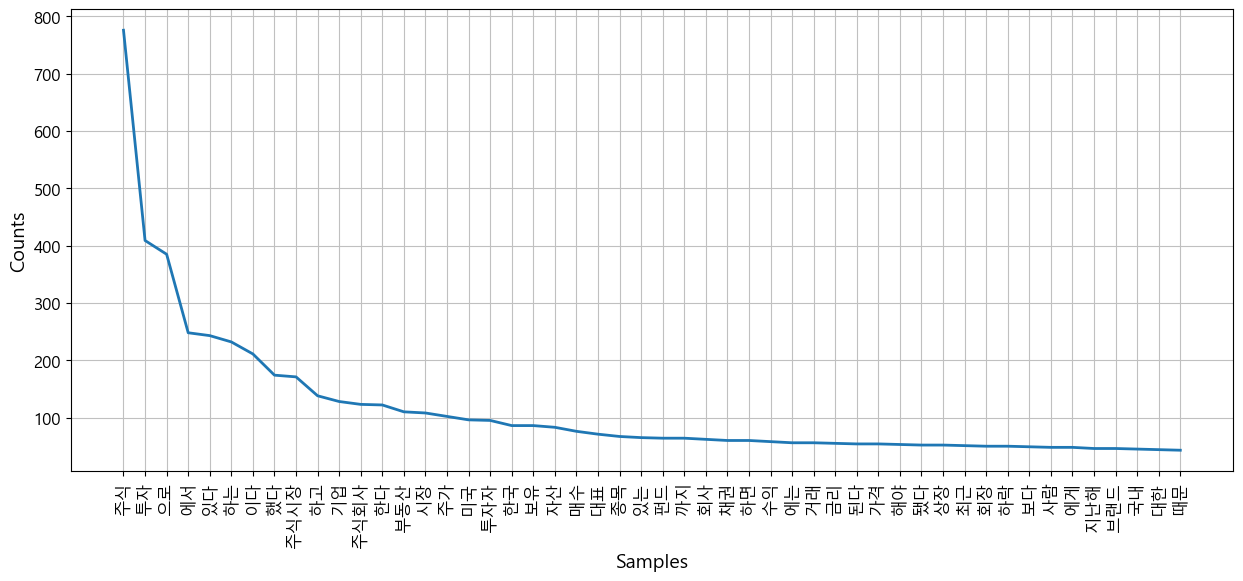

In [7]:
#단어 별 등장 횟수 시각화
plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


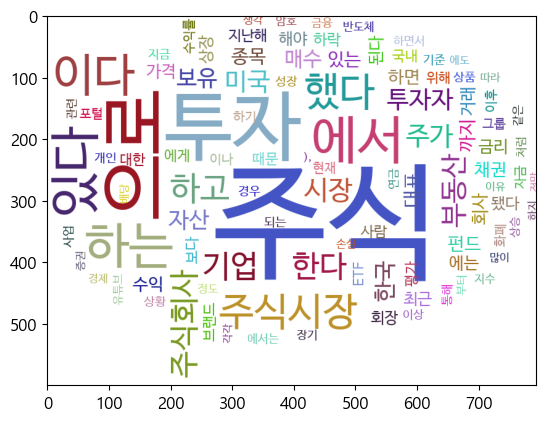

In [8]:
#워드클라우드 생성
import pytagcloud

#자주 등장하는 단어 추출
data = ko.vocab().most_common(101)
#단어 와 단어 등장횟수를 가지고 크기 와 색상을 설정
taglist = pytagcloud.make_tags(data, maxsize=200)
#print(taglist)

#워드클라우드를 이미지 파일로 생성
pytagcloud.create_tag_image(taglist, 'wordcloud.png', size=(900, 600),
                           fontname='Korean', rectangular=False)

import matplotlib.pyplot
import matplotlib.image

img = matplotlib.image.imread('wordcloud.png')
imgplot = matplotlib.pyplot.imshow(img)
matplotlib.pyplot.show()

In [9]:
#연관 단어 추출

!pip install gensim
from gensim.models import word2vec

lines = present_text
okt = Okt()
results = []

for line in lines:
    #품사를 가지고 와서 Josa, Eomi, Punctuation 을 제거
    malist = okt.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
        
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)


Defaulting to user installation because normal site-packages is not writeable




것
”
이

고

분
석
하다
다


곽

이
사
늘다

“
과
거

삼
성
전
자
가다

주
식
시
장


주
도
하다

시
기
를

살
펴다
보
면

필

델
피
아
반
도
체
지다
수

상
승
분
이

S

P
5
0
0

지다
수

상
승
분


초
과
하
면
서다

전
문
가다
들다
이

영
업
이
익










초
전
도
체

바
로

아

급
”
이

늘다

농
담
도

나
온
다

상
반
기

주
식
시
장

주
인
공
이

‘
빅
테
크다

기
업

이
었
다
면

하
반
기
늘다

‘
비
만
치
료
제

기
업

이

바
통


이

받다
았
다


8
월
부
터

시
장
이

정
체
되다









꿈


불
과
하
다
고

비
판
하
늘다

사
람
들다
이

있다
다


하
지다
만

주
식
이
나

코
인


해


느

날

1
억

원
이

생
기
늘다

것


복
권


당
첨
돼다

1
0
억

원

넘다
늘다

돈
이

생
기
늘다

것


갑
자
기

보
상
금
으
로

크다
돈
이

생
기
늘다

것









있다
다


개
인
투
자
자
가다

모
인

온

인

종
목
토
론
실
과

주
식

크다
뮤
니
티

서다
도

이
전
과
늘다

사
뭇

다
른

분
위
기
가다

감
지다
되다
다


2
차
전
지다

열
풍
이

정
점
일

때
늘다

“
똘
똘

뭉
치다

공
매
도

세
력


맞다
서다
야









만
료
되다
늘다

‘
네

마
녀
의

날


주
가다
지다
수

선
물

옵
션


개
별

주
식

선
물

옵
션

만
기
일

이
다


통
상
적
으
로

밉다
국
은

이

파
생
상
품

만
료
일

이
후


증
시

수
익
률
이

상
당
히

안

좋다
다


오다
해

기
준
으
로
늘다










따다
르
면



매
입
하
기










측
은

2
월

1
6
일

I
B
K
투
자
증
권

판
교
점

서다

S
M

터

발
행

주
식

2

9



달
하
늘다

비
정
상
적

매
입

행
위
가다

발
생
하다
다
면
서다

금
감
원


조
사
를

요
청
하
늘다

진
정
서다
를

내다
다


이
복
현

금
감
원
장
은

7
월

1
7
일

해
당









주
가다
가다

당
장

오
를
끄다

가다

투
자

기
준
이

되다
늘다

것
은

주
식
시
장

발
전


저
해
하다
다
”
고

덧
붙다
이다
다


유
튜
브
오다

포
털

서다

각
각

‘
매
거
진
동
아

오다

‘
투
베다
저
스

를

검
색
해

팔
로
잉
하
시
면

기
사









8
월

3
0
일

열
리
늘다

임
시

주
주
총
회

서다

의
결

차다
여

주
식
의

6
0


이
상

찬
성
표
를

받다
으
면

차
기

대다
표


오
르
게

되다
다

L
G

재
무
통

서다

K
T

수
장
으
로
김

후
보
자
늘다

정
통

L
G
맨
으
로

대다
표
적
인









0
1

p


금
리
인
상


연
준

위
원

만
장
일
치
로

단
행
하다
다


이
늘다

주
식
시
장

서다
도

선
반
영
해
온

재
료
이다
기


금
리
인
상

결
과

자
체
늘다

재
료

소
멸

인
식

그

이
상
도

이
하
도

아
니
었
다


사
실
상

관
건
은

시
장










주
당

3
만

원
대다


팔
리
던

하다
화


로
스
페
이
스

주
식
은

6
월

장

중

1
4
만

원
대다
끄다
지다

가다
격
이

뛰다
었
다


역
대다

최
고
가다
다


하다
화
디
펜
스

인
수
오다

계
열
사

이
합
집
산


하다
화
오
션

인
수

등
으
로

기
업
가다
치
가다










선
임
되다
려
면

임
시

주
주
총
회

표
결

서다

의

비
극

상
황
이

나
타
나
지다
늘다

않다


것
이

고

보다
다

국
민
연
금
의

목
적
은

나
이
가다

들다
거
나


갑
작
스

운









전
반
적
인

흐
름


알
아
야

하다
다

”
향
후

계
획
은

“
주
식
은

A
I
매
매
프
로
그
램
으
로

계
속

투
자
하다

예
정
이
다


더
불


현
재

데
이
터

분
석

관


책


내
려
고

준
비
하
고

있다
다


이

책

늘다

회
사

생
활










매
매
가다

아
닌

기
다
리
늘다

매
매
를

하
자


전

재
산


주
식


넣다
고

하
반
기
를

맞다
이
하
늘다

것
은

권
하
지다

않다
늘다
다

”
대다
세

성
장
주
의

경
우

이
밉다

주
가다
가다

많다
이

오
른

상
태
인
데

“
주
가다
가다

많다
이

뜨다

있다
기다









투
자

비
중


1
0


안
쪽
으
로

두
늘다

편
이

낫
다


금

투
자
늘다

주
식
이
나

채
권

등

서다

손
실
이

있다


때

방

하
늘다

용
도
로

포
트
폴
리
오


활
용
하
늘다

것
이

좋다
다

”









판
단
하다
다


이
오다

관

해

하다

투
자

전
문
가다
늘다

“
최
근

주
식
시
장
은

투
자
자
들다
이

합
리
적

판
단
보
다

맹
목
적
으
로

눈
감
고

달
리
늘다

장
으
로

‘
다
음

상
승
장

주
도
주
늘다

테
슬



늘다

전
망
이

힘


얻다
고









정
보
제
공

등
의

의
무
가다

있다
다
”
고

밝다
혔
다


기
업
이

주
식


대다
중

게

판
매
해
서다

돈


조
달
하
기

위
해

상
장
하
게

되다
면

S
E
C


등
록
하
고

허다
가다
를

받다
으
면
서다

회
사

관


정
보
를

투
자
자

게

공
개
해
야









“
증
시
가다

순
풍



았
다


부
동
산
과

주
식

도

관
심
이

많다
아

자
산
관
리
사

자
격
증


취
득
하다

재
테
크다

교
육

전
문
가다
이
기
도

하
다

그
늘다

내
친
김


1
월

입
시

정
보
오다

학
군
지다









하
기

때
문
으
로

풀
이
되다
다

금
융
자
산
은

△
예
적
금

3
2

6


△
주
식

2
2

6


△
수
시
입
추다
금

1
8

8


△
개
인
연
금

1
2

9


△
저
축
성
보
허다

7

9


등
이
었
다


부
동
산
은

거
주
용
이

7
2

8



거
주
용

이
외
가다

2
7

2

이다
다









이

정
도

추
가다

수
익


위
해

주
식


매
수
하
지다

않다
늘다
다


주
식
시
장
의

수
급
이

보다
격
적
으
로

좋다
아
지다
려
면

시
간
이

걸
릴

것
으
로

보
인
다

”
전
저
점

테
스
트
가다

여


번

이
뤄
질

가다
능
성
은

없다
나









낙
관
론


경
계
하다
다


남
석
관

베
스
트
인
컴

대다
표
늘다

최
근

주
식
시
장

움
직
임


대다
해

“
이
밉다

삼
성
전
자

주
가다


반
영
되다

악
재
늘다

다

나
오다
다
고

판
단
하
던

차


투
자
자
들다
이

감
산

발
표


움
직
인









선
택
해
야

하다
끄다


관


업
계

투
자

전
문
가다
늘다

“
최
근

주
식
시
장
과

부
동
산
시
장
이

부
진
해

채
권
형
과

크다
버
드
콜
형
이

좋다
은

성
적


내
고

있다
지다
만

장
기
투
자
의

경
우

결
과
가다

달

질

수

있다
으
니


멀다
저










신
하다
자
산
운
용
의

‘
신
하다
코
리
아
롱
숏

은

국
내

주
식

중

저
평
가다
되다

종
목


사
고

l
o
n
g


고
평
가다
되다

종
목
은

밉다
리

빌다

세
탁

세
제
늘다

물
론


무
엇
보
다

가다
장

중
요
하다

안
심
하
고

사
용
하다

수

있다
늘다

세
제
를









선
택

기
준


제
시
하
기

위
해

제
정
돼다
다




퀸
은

주
식
회
사

레
몬
이

2
0
1
9
년

론
칭
하다

여
성
용
품

브
랜
드
로


나
노

소
재

기
술


적
용
해

고
객
들다

게

다
양
하다

제
품
군


선
보
이
고

있다
다


주
요









은

2
0
1
6
년

설
립
되다

촬
영
조
명
장
비

및

촬
영
소
품

전
문

업
체

주
식
회
사
대다
하다
몰다
의

인
터
넷

전
문

브
랜
드
다


촬
영

조
명


비
롯
해

크다
로
마
키

배
경
지다


스
탠
드


밉다
니
스
튜
디
오


촬
영

감
성

소
품
과

촬
영









지다
난
해

주
총

서다

최
윤
범

사
내
이
사

선
임
은

의
결
권

발
행

주
식

가다
운
데

9
9

2

의

찬
성


얻다
은

반
면

장
형
진

기
타
비
상
무
이
사

선
임
은

찬
성
률

8
3

5



반
대다

및

기
권
이

1
6

5

나

돼다
다


성
용
락

이
민
호










그

다

‘
돈


벌

수

있다
겠다
다


싶다
으
면

쏘다
살
같다
이

주
식

판
으
로

몰다
려
오다

눈

깜
짝
하다

사
이

주
가다
를

오다
린
다


기
업
가다
치

대다
비

주
가다
를

살
피
지다

않다
고

이
런

이
슈
만

쫓다
아

투
자
하다
다
가다
늘다

낭
패

보
기









더
욱

건
강
하
게

키
울

수

있다
다


먹다
이
늘다

배
합
사
료
를

주
식
으
로

하
되다

부
족
하다

영
양
소
늘다

브

인
슈
림
프
를

급
여
해

보
충
해
준
다

하
늘
하
늘

우
아
하다

베
타
태
국
이

원
산
지다
인

베
타
늘다

하
늘


도

예
상
하
지다

못
하다

블
랙
스
완
급

이
베다
트

등
이

있다
다


후
자
늘다

그
야
말
로

예
측

불
가다
능
하다









삼
성
전
자
의

명
운


결
정
하다

시
기
다

”
워
런

버
핏
이

T
S
M
C

주
식


대다
거

매
입
해

화
제
가다

돼다
다


메
모
리
오다

비
메
모
리

파
운
드
리

를

통
틀


단

하
나
의

반
도
체

기
업


투
자
해
야

하다
다
면


디
를









직
접

글

이
드
패
스

g
l
i
d
e

p
a
t
h

투
자
자

연
령
대다


맞다
추다

주
식
과

채
권

등

자
산

비
중


조
절
하
늘다

일
종
의

설
계
도
면

를

만
들다


적
용
하
늘다

방
식
이
며


위
탁

운
용
은

밉다
국

등

외
국

운
용
사
의

자
문










하
고

있다
다


이
럴

때

분
양


도
전
하
늘다

것
은


떨다
끄다

“
주
식
시
장

격
언

가다
운
데

‘
떨다

지다
늘다

칼
날


잡
지다

마


늘다

말
이

있다
다


지다
금

부
동
산

대다
세

하
락

초
기
인
데

왜

앞
으
로

생
길

수

있다
늘다









회
장


김
범
수

카
카
오

창
업
자
를

제
치
고

국
내

주
식

부
호

순
위

9
위

서다

6
위
로

오다

가다
다


조

회
장
은

하다
진
그
룹

창
업
주
인

고

조
중
훈

회
장
의

4
남

1
녀

중

막
내
다


고

조
양
호

전

하다
진
그
룹

회
장










듀
크다
리
얼
티
오다

편
두
통

치
료
제

개
발
사

바
이
오
헤
이
븐

주
식


다
량

매
수
하다
으
며


아
마
존
은

2
만
3
0
0
0
주

매
도
해

1
9
8
1
만

주

보
유
하다

것
으
로

나
타
나다
다


유
튜
브
오다

포
털

서다

각
각


니
다


은
퇴

후

안
정
적
인

소
득
원

확
보
를

위
해

은
퇴










그

후

5
년
간

금
은

가다
치
의

3
분
의

2
를

잃다
었
다

•

소
수
의

주
식


주
의

깊다
게

연
구
하
늘다

월
스
트
리
트

애
널
리
스
트
들다
조
차

술

잡
기

놀
이
를

하
늘다

편
이

나


것
이
다


펀
드

매
니
저

데
이
비
드









원

달


환
율
은

1
3
년

5
개
월

만


1
3
9
0
원


넘다
기다
다


국
내

주
식
시
장


들다

오다

있다
던

외
국
인

자
보다
이

빠
지다
나
가다

코
스
닥
지다
수
늘다

1
월

대다
비

2
5

9
8


떨다

지다

주
요

2
0
개
국

G
2
0


가다
운
데

하
락
률
이

가다
장









최
초
로

표
준
설
계

인
증


받다
아

산
업


선
도
하
고

있다
다


주
식
시
장

티
크다

종
목
명

역
시

S
M
R
다


투
자
자
들다
의

관
심
도

뜨다
겁
다


5
월

3
일

상
장

이
후

9
월

1
4
일

현
지다

시
간

끄다
지다

주
가다
가다

3
0

9


오다
랐
다


같다
은









를

기
록
하다
다
고

밝다
혔
다


이
늘다

역
대다

최
대다

규
모
다


F
D
I
늘다

주
식

채
권

등

금
융
투
자
가다

아
니


지다
속
적
인

이
익


얻다
기

위
해

현
지다


공
장


짓
거
나

생
산
설
비


기
술

제
휴

등


투
자
하
늘다

방
식










만
나

9
월

F
O
M
C
의

선
택


예
측
해
보
고

대다
응
책
도

짚

보다
다

주
식
시
장
은

9
월

F
O
M
C

결
정


따다


또
다
시

추다
렁
일

것
으
로

보
인
다

“
시
장
은

9
0


확
률
로

9
월

F
O
M
C

서다

0

7


상
향

조
정
하다
다


‘
포
브
스


주
식
분
석
팀
의

트
레
피
스

팀
은

“
스
노
우
플
레
이
크다
의

제
품

매
추다
이

2
0
2
9
년
끄다
지다

1
0
0
억

달


약

1
3
조

원

로

성
장
하다

수

있다


것
”
이

며









저
P
E
R

경
기
민
감
도

주
식


매
수
하
고

고
P
E
R

경
기
민
감
도

주
식


매
도
하다
다
면

계
속

경
기
가다

좋다


때

매
수
를

하
고

경
기
가다

나
쁠

때

매
도
를

해
서다

돈


잃다
게

되다
다

그
보
다
늘다

P
B
R

시
가다
총
액

순
자
산











전
산
학

석
사
학
위
를

받다
은

후

하다
국
데
이
터
통
신
주
식
회
사

데
이
콤


서다

일
하다
다


이
후

회
사
를

그
만
두
고

밉다
국
으
로

건
너
가다

매
사
추
세
츠
공
대다

M
I
T


서다

컴
퓨
터
공
학

박
사
학
위
를

취
득
하다
다


이
후










특
히

초
보

투
자
자

면


찌
하다

바
를

모
를

수

있다
다


주
식
시
장
이

늘

상
승
만

하
늘다

곳
이

아
니

늘다

점


많다
은

투
자
자
가다

격
하
게

느
끼다

상
반
기
이다
다

이
런

시
기

개
인
투
자
자
가다

생
각
해
야

하다

것
은









평
가다
다


7
월

2
7
일

6
개
월

보
호
예
수

해
제

물
량

9
9
6
만

주

총

주
식

수
의

4

2


규
모

늘다

상
장

이
후

일
평
균

거

량

7
8
만

주



비
해

많다
기다

해

단
기
적

영
향
은

밉다
칠

수

있다
으
나


장
기
적
으
로
늘다

주
가다


별









두다
화
되다
고


국
내

금
리

인
상

도

가다
속
도
가다

붙다


부
동
산


주
식

등


투
자


나









당
부
하
고

싶다
은

말
이

있다
나
요

“
해
외
주
식
도

결
국

주
식
입
니
다


투
자
하다

기
업
이


떤다

경
쟁
력


지다
니
늘다
지다


그

경
쟁
력
이

3
개
월
마
다

발
표
되다
늘다

실
적

서다

자다

유
지다
되다
고

있다
늘다
지다


자
사
주

매
입
이
나









것


볼

수

있다
다

마
지다
막
으
로

2
0
2
2
년

2
월

2
2
일

기
준

하다
국

주
식
시
장


버
핏
의

저
P
E
R

P
B
R

전
략


따다
른

2
0
개
의

종
목


제
시
하다
다

강
환
국
2
0
2
1
년

7
월

직
장
인

투
자
자

서다

‘
3
0
대다

파
이

족

으
로









모
니
터
링


통
해

반
드
시

투
자
관
리
를

해
야

합
니
다


주
식
투
자
늘다

규
모
가다

크다
지다
면

관
리
가다


렵
기


종
목
별
로

검
토
해

옥
석


가다
린

뒤

성
장

가다
능
성
이

높다
은

종
목
만

보
유
하
고

나
머
지다
늘다









바
란
다


그
런

날


꿈
꾸다
며

노
력
하다

것
이
다


아
트

주
식
이

투
자

트
렌
드
로

자
리
매
김
하
늘다

날
이


서다

오
길

기
대다
하다
다

”

유
튜
브
오다

포
털

서다

각
각

‘
매
거
진
동
아

오다

‘
투
베다
저
스

를

검
색
해









혁
명
적
인

투
자
처
로

뜨다
오
르
고

있다
다
”
면
서다
도

“
다
만

주
식


암
호
화
폐
보
다

가다
격

변
동
성
이

크다
므
로

예
술


관
심

없다
이

투
자
만

하
늘다

것
은

추
천
하
지다

않다
늘다
다
”
고

말
하다
다

N
F
T

예
술

작
품

가다
격
은










지다
수
늘다

다
시

주
식


채
권


부
동
산
으
로

세
분
화
되

예
정
이

요

요
즘

메
타
버
스
가다

과
연









사
채
를

말
하
고


신
주
인
수
권
부
사
채

B
W

늘다

발
행

회
사
의

주
식


매
입
하다

수

있다
늘다

권
리
가다

부
여
되다

사
채
다

H
M
M

민
영
화
늘다

기
업
이

매
각

가다
능
성


언
급
해
온

산
은

지다
분

2
0

6
9


1
억
1
1
9
만
9
2
9
7
주











상
환


위
하다

단
기

현
금
성

자
산

준
비
가다

더

필
요
합
니
다


주
식
투
자
늘다

초
보

수
준
이


권
하
지다

않다
으
나


꼭

해
야

하다
다
면

소
액
으
로

시
도
해
보
길

바
랍
니
다


보
허다
은

소
득

대다
비

8

가다
량
으
로









고
객
이

금
융
기
관


돈


맡다
기
며

특
정

기
업

주
식

또
늘다

부
동
산

개
발

등


투
자
해

달

고

하
면

이


따다


운
용
하
늘다

금
융
상
품
이
다

대다
장
동

의
혹


수
사
하
던

검
찰
은

성
남
도
공


화
천
대다
유









난

것
이
다


1
9
7
4
년

1
2
월

6
일
자
로

하다
국
반
도
체

주

의

주
식

5
0


인
수
가다

확
정
되다

것
이
다

”
대다
하다
민
국

반
도
체

역
사
의

始
祖

강
기
동
하다
국
반
도
체
늘다


떤다

회
사
이다

끄다


이

회
사

설
립
자

강
기
동

박
사
늘다









그

자
리

서다

2
개
를

포
장

주
문
하다
다

마
침

매
장


있다
던

주
식
회
사

차
차

나
기
정

대다
표

게

“
정
말

맛
있다
다
”
고

하
니

“
우
리

치
즈
늘다

충
남

천
안

목
장

서다

짜다
내다

지다

7
2
시
간

이
내

우
유
로
만









인
정
받다
은

지다
금
의

여
세
를


우
회
상
장


하
면

훨
씬

쉬
운










제

주
변

늘다

돈


번

사
람
보
다

잃다
은

사
람
이

많다
아

주
식
투
자


나
서다
기
도

겁
나
늘다
데
요


재
테
크다
를

자다
하
려
면


떻
게

해
야

하다
끄다
요

A

초
저
금
리

시
대다


부
동
산

가다
격

폭
등


급
속
하다

고
령
화


낮
은









확
인
하다

수

있다
다


이
런

점

때
문


D
A
O

토
크다

보
유
자
들다
은

주
식
회
사

주
주
오다

달
리

제
삼
자
의

신
뢰
나

관
리
가다

필
요

없다
다

대다
부
분
의

D
e
f
i

D
e
c
e
n
t
r
a
l
i
z
e

F
i
n
a
n
c
e

탈
중
앙
화
금
융


프
로
젝
트
가다

D
A
O

형
태
로









앱

설
치
를

유
도
하다

후

디
지다
털

자
산


은
행

예
금


주
식

대다
금

등


가다
로
채
늘다

사
례
가다

급
증
하
고

있다
다


경
찰
청

‘
전
기
통
신
금
융
사
기

수
사
상
황
실


자
료


따다
르
면

기
관

사
칭
형

범
죄
늘다

2
0
2
1
년










거


플
랫
폼

거


방
식
과

흡
사
하
다

매
도
자


접
근
해

주
식

가다
로
채
늘다

신
종

수
법

성
행
사
설

플
랫
폼


통
하다

비
상
장
주
식

거

가다

늘
면
서다

사
기
를

당
하
늘다

일
도

심
심
찮
게

벌

진
다


예
전

늘다









S
E
C

늘다

테

폼
랩
스
의

‘
밉다


프
로
토
콜


밉다
국
주
식


추
종
하
늘다

토
크다

이

증
권
법


위
반
하다
늘다
지다

여
부
를

수
사
하
고

있다
다


일
보다
과

하다
국
도

C
B
D
C

실
허다


박
차
를

가다
하
고

있다
다

하다
국

서다
늘다









수

있다



걸
리
늘다

지다
난
날
의

자다
못










‘

펌

A
f
f
i
r
m


의

주
가다
가다

4
0


가다
끄다
이

폭
등
하다
다


금
요
일

주
식
시
장

마
감

후

진
행
되다

시
간
외
거


서다

주
가다
가다

갑
자
기

튀다

것
이
다

이

시
각

발
표
되다


펌
과

아
마
존
의

협
력

소
식
이

주
가다
를









악
재
다


최
근

상
당
수

중
국

빅
테
크다

기
업
이

글
로
벌

주
요

주
식
시
장


상
장
하다
다


투
자
자
들다
은

당
장

손
실


만
회
하
고
자

투
자

포
트
폴
리
오
를

조
정
하다

수
밖


없다
다


이
밉다

일
보다









유
리
하다

투
자

방
식


택
하다

필
요
가다

있다
다


특
정

기
업
보
다

주
식
시
장


가다
지다
가다
늘다

것
이

덜

위
허다
하
다


기
업
의

장
기

성
장
보
다

시
장
의

장
기

성
장

가다
능
성
이

높다
다


집
중
투
자
보
다

분
산
투
자
가다

손
실









노
력


다
른

곳


투
입
하
늘다

게

맞다
으
니
끄다
요


일
례
로

주
식

대다
신

E
T
F


펀
드

같다
은

간
접

상
품


분
산

투
자
해

자
금


굴
릴

수
도

있다

요


또

투
자

공
부
보
다
늘다


그
림

실
력
이

뛰다

나
다
면

이
를









시
간

하다
국

주
식
시
장
이

위
아

로

급
등
락
하
늘다

이
유

중

하
나
로

‘
낮
은

배
당
수
익
률



지다
목
하다

바

있다
다


이


대다
해

다
음
과

같다
은

의
문


제
기
하
늘다

독
자
가다

적
잖다
았
다

“
예
전

늘다

하다
국









종
목
도

뜨다
오다
랐
다


계
좌
를

만
들다
고

일
주
일
가다
량

낮
밤
으
로

주
식


의

공
로
를









얻다


수

있다
다


지다
금
도

단
돈

1
0
만

원
으
로

삼
성
전
자

주
식


살

수

있다
늘다
데

망
설
일

이
유
가다

없다
다


백
문
이

불
여
일
견


책

1
0
0
권

읽다
늘다

것
보
다

1
0
만

원
이

도

직
접

투
자
하다

경
허다


통
해

더

많다
은









7
월

1
9
일

임
직
원

3
6
0
명

게

각
각

6
0
0
주

상
당
의

주
식
매
수
선
택
권

스
톡
옵
션


지다
급

계
획

밝다
혀


행
사
가다
늘다

7
만
6
7
0
0
원


직
원
들다
도


대다
표
도

모
두

싱
글
벙
글

★

점
심
은

치
킨

저
녁
은

스
테
이
크다


박
현
종









방
침
이
다


증
설

효
과
로

음
극
재

부
문

매
추다
이

늘

나
면

주
식

가다
격
도

우
상
향
하다

것
으
로

예
상
되다
다


포
털

서다

‘
투
베다
저
스

를

검
색
해

포
스
트
를

팔
로
잉
하
시
면

다
채
로
운

투
자

정
보
를









고
려
해
야

하다
다


가다
계
로
서다
늘다

다

같다
은

자
산
인
데

주
식
양
도
차
익
과

부
동
산
양
도
소
득


대다
해

세
율


동
일
하
게

적
용
하다
지다

차
등

적
용
하다
지다

충
분
히

고
민
해
야

하다
다

”
김
낙
회

고
문
은

조
세
정
책

늘다









높다
다


과
거

우
리
나


역
사
를

보
면

그

시
기


부
동
산
과

주
식

둘

중

하
나


혹
은

둘

다

폭
락
하다
다


만
약

지다
금

매
수
를

계
획
하
늘다

사
람
이

면

서다
울

지다
역


권
하
고

싶다
다


현
재

수
도
권

도









의
밉다
를

자다

몰다


원
장
직


임
명
되다
기

전
부
터

보
유
하다



때
문
이
다

G
S
리
테
일

주
가다
늘다

남
혐

포
스
터

논
란

이
후

하다
때









비
트
코
인

가다
격


의
도
적
으
로

조
작
하
고

있다
다


주
식
시
장
이
었
다
면

바
로

구
속
감
”
이

고

하다
다


그
늘다

“
장
난
으
로

만
들다

도
지다
코
인
이


째다
들다

머
스
크다
의

입


거
치
면
서다

가다
치
가다

부
여
돼다









좋다
습
니
다

우
리
나

만

보다
도

암
호
화
폐

서다

오
가다
늘다

돈
이

주
식

시
장
보
다

크다

상
황
입
니
다


그
럼

도

아
직

암
호
화
폐
를

금
융
자
산
으
로

보다
야

하다
지다


대다
하다

논
쟁
이

계
속
되다
고

있다
습
니
다

자
산
으
로









월
급
으
로

갚다


수

있다
늘다

만
크다
만

빌다
리
세
요


코
인
은

주
식
보
다

더

위
허다
하
니

조
심
하
시
고
요


또

잃다
었
다


이
건

아
니
다

싶다
으
면

손
절
하
고

잊다


줄
도

알
아
야

합
니
다


중
독


빠
지다
늘다

이
유

중









수

있다
늘다

방
법
은

새다

드


무
침


국

등

다
양
하
지다
만

밥
이

주
식
인

하다
국
인

게
늘다

단
연

김
치
가다

최
고
다


포
기
김
치


오
이
소
박
이


열
무
김
치


자다

익
은

맛
깔다
스

운

김
치
만

있다
으
면

특
별
하다

반
찬
이









은
행
잔
고
증
명
서다

또
늘다

예
금
잔
액
증
명
서다



주
식
거

내
역
서다
가다

필
요
합
니
다

이
렇
게

제
추다
하다

서다
류
늘다

사
실


기
반


두다
야

하
고


만
약

자
금
조
달
계
획
서다

및

증
빙

서다
류
를

확
인
하다

결
과

자
금

추다
처
가다









수
령

시

연
금


In [10]:
#형태소 분석한 문장들을 파일에 저장한 후 Word2Vec 모델을 생성
data_file = '주식.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
    data = word2vec.LineSentence(data_file)
    
model = word2vec.Word2Vec(data, vector_size=200, window=10, hs=1, min_count=2, sg=1)
#모델을 저장
model.save("주식.model")
model = word2vec.Word2Vec.load("주식.model")
#연관된 단어 추출 - 밉다 와 연관 관계가 긍정적으로 높은 10개의 단어 추출
model.wv.most_similar(positive=['밉다'])

[('렇', 0.192),
 ('일', 0.179),
 ('칭', 0.173),
 ('캡', 0.172),
 ('황', 0.166),
 ('t', 0.163),
 ('D', 0.162),
 ('랫', 0.159),
 ('낭', 0.152),
 ('옥', 0.151)]

## tweet_temp.csv 파일의 내용을 읽어서 손흥민 관련 연관 규칙 분석

In [11]:
df = pd.read_csv('./data/tweet_temp.csv')
df.head()

created                                         tweet_text
0  2019-04-01 10:55:00  Legends At New Spurs Stadium\nTottenham Hotspu...
1  2019-04-01 10:52:30  RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...
2  2019-04-01 10:49:33  RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...
3  2019-04-01 10:49:03                  귀여워💜 #손흥민 https://t.co/hstR1vALAf
4  2019-04-01 10:45:26  RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...

In [12]:
#한글만 추출
import re

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]+') #한글 정규 표현식
    #한글이 아닌 것은 전부 ''로 치환
    result = hangul.sub('', text)
    return result

df['ko_text'] = df['tweet_text'].apply(lambda x:text_cleaning(x))
print(df.head())
    
    
    
    
    
    

               created                                         tweet_text  \
0  2019-04-01 10:55:00  Legends At New Spurs Stadium\nTottenham Hotspu...   
1  2019-04-01 10:52:30  RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...   
2  2019-04-01 10:49:33  RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...   
3  2019-04-01 10:49:03                  귀여워💜 #손흥민 https://t.co/hstR1vALAf   
4  2019-04-01 10:45:26  RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...   

                                             ko_text  
0                                                     
1    트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    
2    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...  
3                                           귀여워 손흥민   
4    경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...  


In [13]:
#한글 형태소 분석
from konlpy.tag import Okt
from collections import Counter

#한국어 불용어 사전
#https://www.ranks.nl/stopwords/korean 에서 복사
korean_stopwords_path = "./data/stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
#print(stopwords)

def get_nouns(x):
    nouns_tagger = Okt()
    #형태소 분석
    nouns = nouns_tagger.nouns(x)
    #1글자 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    #불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    return nouns

df['nouns'] = df['ko_text'].apply(lambda x:get_nouns(x))

df.head()





created                                         tweet_text  \
0  2019-04-01 10:55:00  Legends At New Spurs Stadium\nTottenham Hotspu...   
1  2019-04-01 10:52:30  RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...   
2  2019-04-01 10:49:33  RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...   
3  2019-04-01 10:49:03                  귀여워💜 #손흥민 https://t.co/hstR1vALAf   
4  2019-04-01 10:45:26  RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...   

                                             ko_text  \
0                                                      
1    트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스     
2    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...   
3                                           귀여워 손흥민    
4    경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...   

                                               nouns  
0                                                 []  
1  [트릴, 리온, 축구, 국가대표, 손흥민, 선수, 샴푸, 모델, 기용, 출처, 한국...  
2                                          [손흥민, 말씀]  
3                                              [손흥민]  
4  [경남, 도민, 일보, 프로축구, 연맹, 경기장, 선거운동, 손흥민, 영국, 관중,...

### 연관 규칙 분석 API 사용

In [14]:
!pip install apyori

Defaulting to user installation because normal site-packages is not writeable


In [15]:
#거래 생성
transactions = [['손흥민', '케인'], 
                ['손흥민', '시소코'],
                ['손흥민', '포체티노', '케인']]

from apyori import apriori
#별다른 옵션없이 연관 규칙 분석 수행
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'포체티노'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'포체티노'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'시소코', '손흥민'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '시소코'}), confidence=0.3333333333333333, lift=1.0), Or

In [16]:
#지지도 0.5 이상 향상도 1.0 이상 신뢰도 0.6 이상 인 거래만 확인
results = list(apriori(transactions, min_support=0.5,
                      min_confidence=0.6, min_lift=1.0, max_length=2))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'손흥민', '케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])


In [17]:
#데이터프레임의 데이터를 list로 변환
transactions = df['nouns'].tolist()
#데이터가 없는 경우는 제외하고 list로 다시 생성
transactions = [transaction for transaction in transactions if transaction]

results = list(apriori(transactions, min_spport=0.1, min_confidence=0.2, min_lift=5,
                      max_length=2))
for result in results:
    print(result)

RelationRecord(items=frozenset({'국가대표팀', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'국가대표팀'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'국가대표팀'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'금메달', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'금메달'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'금메달'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'모습', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'모습'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'모습'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'아시아', '게임'}), support=0.14285714285714285, ordere

In [18]:
#결과를 DataFrame 으로 변환 - 1개의 상품의 경우는 제거
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

for result in results:
    if len(result.items) == 2:
        #결과의 item 이름을 가지고 와서 list로 생성
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        #시리즈로 변환
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)
print(network_df.head())
        
        
        
        
        
        
        

  source target   support
0  국가대표팀     게임  0.142857
1    금메달     게임  0.142857
2     모습     게임  0.142857
3    아시아     게임  0.142857
4     의조     게임  0.142857


C:\Users\USER\AppData\Local\Temp\ipykernel_4628\2772075102.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_df.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\2772075102.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_df.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\2772075102.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_df.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\2772075102.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_d

### 네트워크 시각화

In [19]:
tweet_corpus = ''.join(df['ko_text'].tolist())
print(tweet_corpus)

             트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 귀여워 손흥민   경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 관중이 인종차별 행위를 한 것과 같은 급으로 보고 있다 그만큼 축구장 내 선거운동 규정 위반이 엄격하다는 이야기인데요 내가 선택을 받지 않았더라면 손흥민보다 축구를 잘했었을까안녕하세요 토트넘 골수팬 렙 승부사입니다 제일 좋아하는 선수는 손흥민입다   계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간  안녕하십니까 손흥민입니다 오랜만에 트위터에 들어오니 매우 어색하네요오늘 경기도 많은 관심 부탁드립니다  계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간   출국손흥민    출국손흥민   한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요 한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요    긴급속보 하리보 신제품이 나온다고 손흥민 이 개시하는 하리보 신제품 썬샤인을 가장 먼저 받아보고 싶다면 팔로우 하고 알림 설정까지 해두기하리보 신제품              트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋ

In [20]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)
remove_char_counter = Counter({x:count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'손흥민': 560, '하리보': 245, '축구': 140, '선수': 140, '조현우': 140, '황의조': 140, '금메달': 140, '모델': 105, '한국': 105, '신제품': 105, '선거운동': 70, '보고': 70, '계정': 70, '지기': 70, '실수': 70, '삭제': 70, '다시': 70, '홍보': 70, '발탁': 70, '기념': 70, '해당': 70, '추첨': 70, '통해': 70, '골드바': 70, '기간': 70, '출국': 70, '국가대표팀': 70, '아시아': 70, '게임': 70, '모습': 70, '의조': 70, '진짜': 70, '트릴': 35, '리온': 35, '국가대표': 35, '샴푸': 35, '기용': 35, '출처': 35, '경제': 35, '네이버': 35, '뉴스': 35, '말씀': 35, '경남': 35, '도민': 35, '일보': 35, '프로축구': 35, '연맹': 35, '경기장': 35, '영국': 35, '관중': 35, '인종차별': 35, '행위': 35, '축구장': 35, '규정': 35, '위반': 35, '이야기': 35, '선택': 35, '토트넘': 35, '골수팬': 35, '승부사': 35, '제일': 35, '입다': 35, '안녕하십니까': 35, '트위터': 35, '매우': 35, '오늘': 35, '경기도': 35, '관심': 35, '긴급': 35, '속보': 35, '개시': 35, '샤인': 35, '가장': 35, '먼저': 35, '팔로우': 35, '알림': 35, '설정': 35, '두기': 35})


In [21]:
#단어이름을 node로 빈도수를 nodesize로 하는 데이터프레임 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50]
node_df.head()

node  nodesize
2    축구       140
4   손흥민       560
5    선수       140
7    모델       105
10   한국       105

In [22]:
#네트워크 시각화 패키지 설치
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable


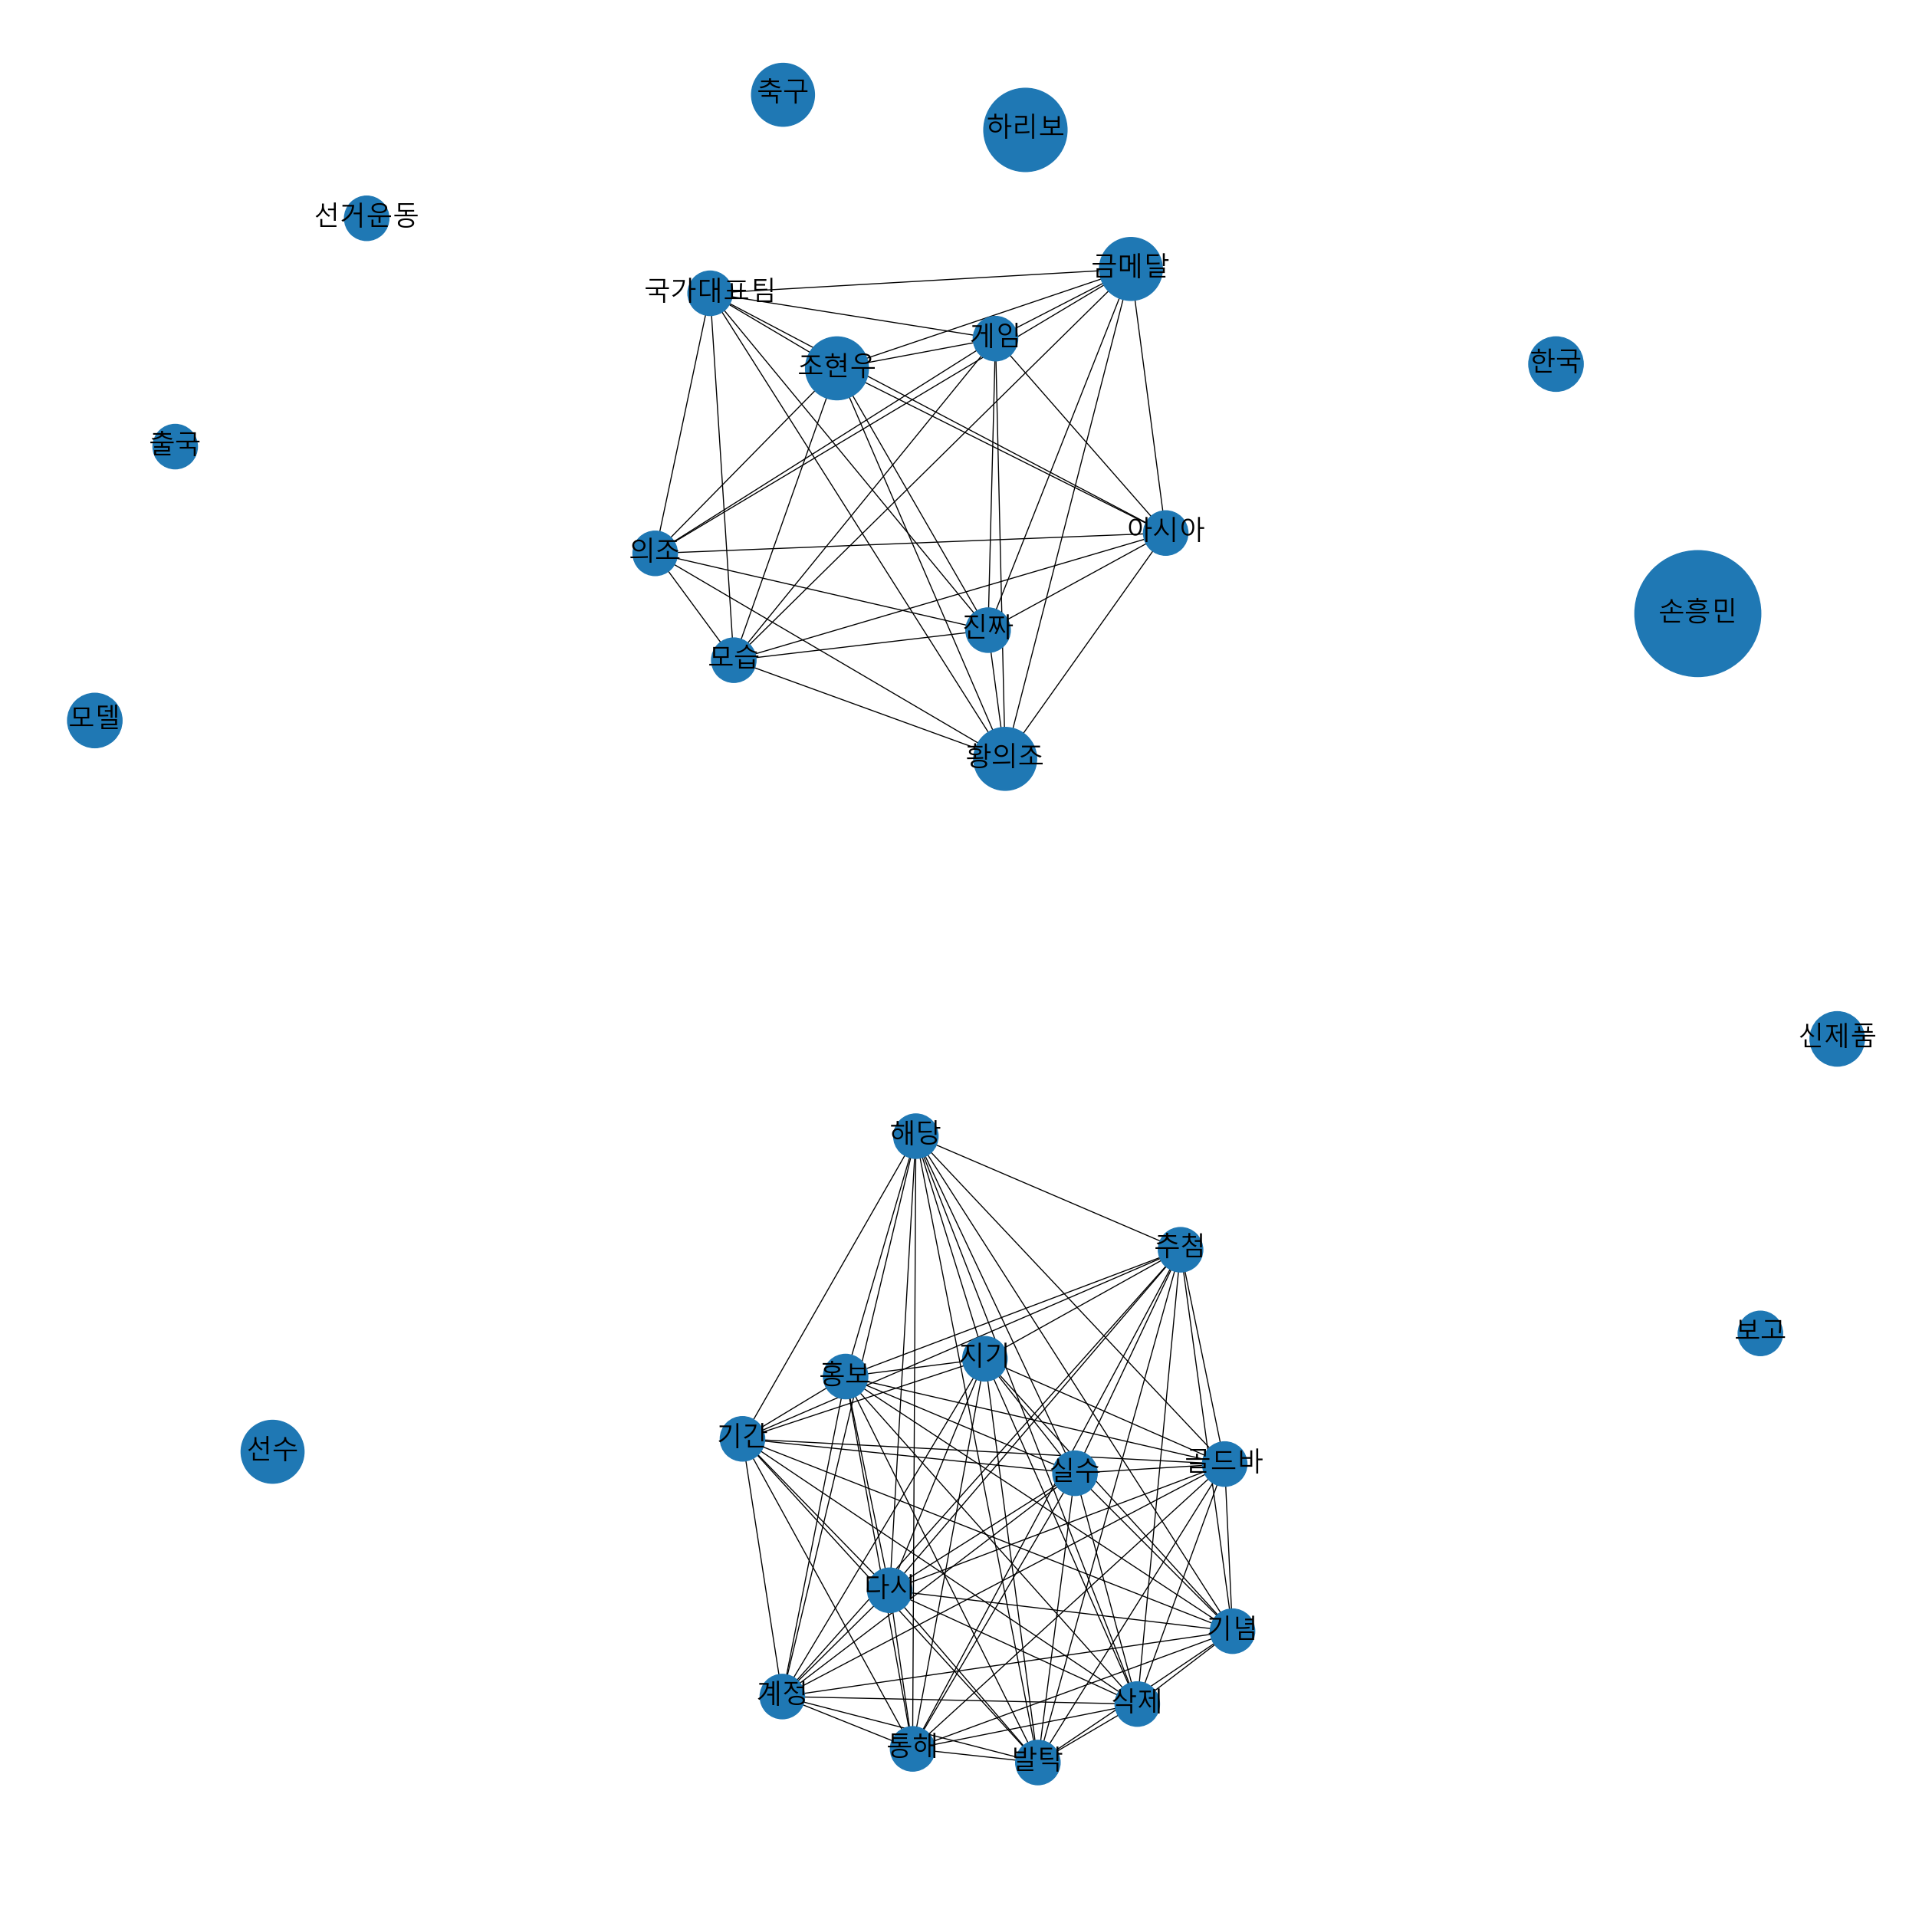

In [23]:
import networkx as nx
plt.figure(figsize=(25, 25))

#그래프 인스턴스 생성
G = nx.Graph()

#노드 생성
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

#노드 사이의 간선을 생성
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

#한글이 있는 경우 폰트 설정 - Mac 은 AppleGothic Windows는 Malgun Gothic
nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic',
                      font_size=25)
ax = plt.gca()
plt.show()

## 콘텐츠 기반의 영화 추천 서비스

In [24]:
#데이터 읽어오기
movies = pd.read_csv('./data/tmdb/tmdb_5000_movies.csv')
print(movies.shape)

(4803, 20)


In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### 필요한 피처만 추출

In [26]:
movies_df = movies[['id', 'title', 'genres', 'vote_average', 'vote_count',
                   'popularity', 'keywords', 'overview']]
print(movies_df[['genres', 'keywords']][:1])

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            keywords  
0  [{"id": 1463, "name": "culture clash"}, {"id":...  


In [27]:
#장르 와 키워드는 문자열인데 포맷이 python 의 list
#이 때 사용하는 함수는 eval 이나 ast 패키지의 literal_eval 함수 입니다.
from ast import literal_eval
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

#genres 와 keywords 의 dict 에서 name에 해당하는 값만 추출해서 list로 생성
movies_df['genres'] = movies_df['genres'].apply(lambda x: [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x: [y['name'] for y in x])

print(movies_df[['genres', 'keywords']][:1])


C:\Users\USER\AppData\Local\Temp\ipykernel_4628\2952353352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres'] = movies_df['genres'].apply(literal_eval)


                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   

                                            keywords  
0  [culture clash, future, space war, space colon...  


C:\Users\USER\AppData\Local\Temp\ipykernel_4628\2952353352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\2952353352.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres'] = movies_df['genres'].apply(lambda x: [y['name'] for y in x])
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\2952353352.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [28]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   genres        4803 non-null   object 
 3   vote_average  4803 non-null   float64
 4   vote_count    4803 non-null   int64  
 5   popularity    4803 non-null   float64
 6   keywords      4803 non-null   object 
 7   overview      4800 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 300.3+ KB


In [29]:
#장르별 유사도 측정을 위해서 장르를 피처 벡터 행렬로 생성
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df = 0.0, ngram_range=(1, 2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


C:\Users\USER\AppData\Local\Temp\ipykernel_4628\1262241771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))


In [30]:
#코사인 유사도 측정
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim[:2])

[[1.    0.596 0.447 ... 0.    0.    0.   ]
 [0.596 1.    0.4   ... 0.    0.    0.   ]]


In [31]:
#유사도 정렬
genre_sim_soreted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_soreted_ind[:1])
#여기서 출력되는 값은 유사도가 높은 행의 인덱스입니다.

[[   0 3494  813 ... 3038 3037 2401]]


In [32]:
#장르의 유사도를 이용한 영화 추천 함수
def find_sim_movie(df, sorted_ind, title, top_n=10):
    #제목을 가지고 영화 찾기
    title_movie = df[df['title'] == title]
    #영화의 인덱스 찾기
    title_index = title_movie.index.values
    #유사도 행렬 찾아오기
    similar_indexes = sorted_ind[title_index, :(top_n)]
    similar_indexes = similar_indexes.reshape(-1) #flatten 도 가능
    return df.iloc[similar_indexes]

In [33]:
#영화 추천
similar_movies = find_sim_movie(movies_df, genre_sim_soreted_ind, 'The Godfather', 15)
print(similar_movies[['title', 'vote_average']])

                                               title  vote_average
2731                          The Godfather: Part II           8.3
1243                                    Mean Streets           7.2
3636                                   Light Sleeper           5.7
1946  The Bad Lieutenant: Port of Call - New Orleans           6.0
2640         Things to Do in Denver When You're Dead           6.7
4065                                      Mi America           0.0
1847                                      GoodFellas           8.2
4217                                            Kids           6.8
883                              Catch Me If You Can           7.7
3866                                     City of God           8.1
3112                         Blood Done Sign My Name           6.0
4041                                 This Is England           7.4
588                  Wall Street: Money Never Sleeps           5.8
3337                                   The Godfather          

In [34]:
#영화의 평점을 내림차순으로 정렬해서 10개 확인
movies_df[['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False)[:10]

title  vote_average  vote_count
3519          Stiff Upper Lips          10.0           1
4247     Me You and Five Bucks          10.0           2
4045     Dancer, Texas Pop. 81          10.0           1
4662            Little Big Top          10.0           1
3992                 Sardaarji           9.5           2
2386            One Man's Hero           9.3           2
2970        There Goes My Baby           8.5           2
1881  The Shawshank Redemption           8.5        8205
2796     The Prisoner of Zenda           8.4          11
3337             The Godfather           8.4        5893

In [35]:
#가중 평점 구하기
C = movies_df['vote_average'].mean() #전체 영화의 평점 평균
m = movies_df['vote_count'].quantile(0.5) #최소 리뷰의 개수
print(C)
print(m)

6.092171559442016
235.0


In [36]:
def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ((v/(v+m)) * R) + ((m/(m+v)) * C)

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)
movies_df[['title', 'vote_average', 'weighted_vote', 'vote_count']].sort_values('weighted_vote', ascending=False)[:10]

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\3557348153.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)


title  vote_average  weighted_vote  vote_count
1881  The Shawshank Redemption           8.5       8.432957        8205
3337             The Godfather           8.4       8.311498        5893
662                 Fight Club           8.3       8.246223        9413
3232              Pulp Fiction           8.3       8.240109        8428
1818          Schindler's List           8.3       8.186319        4329
3865                  Whiplash           8.3       8.184420        4254
2294             Spirited Away           8.3       8.172677        3840
65             The Dark Knight           8.2       8.159521       12002
2731    The Godfather: Part II           8.3       8.154789        3338
809               Forrest Gump           8.2       8.139311        7927

In [37]:
movies_df[['title', 'vote_average', 'weighted_vote', 'vote_count']].sort_values('vote_average', ascending=False)[:10]

title  vote_average  weighted_vote  vote_count
3519          Stiff Upper Lips          10.0       6.108730           1
4247     Me You and Five Bucks          10.0       6.125149           2
4045     Dancer, Texas Pop. 81          10.0       6.108730           1
4662            Little Big Top          10.0       6.108730           1
3992                 Sardaarji           9.5       6.120930           2
2386            One Man's Hero           9.3       6.119242           2
2970        There Goes My Baby           8.5       6.112491           2
1881  The Shawshank Redemption           8.5       8.432957        8205
2796     The Prisoner of Zenda           8.4       6.195367          11
3337             The Godfather           8.4       8.311498        5893

In [38]:
#장르의 유사도 와 가중 평점을 이용한 영화 추천 함수
def find_sim_movie(df, sorted_ind, title, top_n=10):
    #제목을 가지고 영화 찾기
    title_movie = df[df['title'] == title]
    #영화의 인덱스 찾기
    title_index = title_movie.index.values
    
    #유사도 행렬 찾아오기
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1) #flatten 도 가능
    #현재 영화는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

In [39]:
similar_movies = find_sim_movie(movies_df, genre_sim_soreted_ind, 'The Godfather', 15)
print(similar_movies[['title', 'vote_average', 'weighted_vote']])

                            title  vote_average  weighted_vote
1881     The Shawshank Redemption           8.5       8.432957
2731       The Godfather: Part II           8.3       8.154789
1847                   GoodFellas           8.2       8.052709
3866                  City of God           8.1       7.869722
1663  Once Upon a Time in America           8.2       7.820138
3887                Trainspotting           7.8       7.661128
883           Catch Me If You Can           7.7       7.606243
892                        Casino           7.8       7.539728
281             American Gangster           7.4       7.223063
4041              This Is England           7.4       6.886054
1243                 Mean Streets           7.2       6.751138
1149              American Hustle           6.8       6.745319
2582   The Place Beyond the Pines           6.8       6.711896
2839                     Rounders           6.9       6.618339
4217                         Kids           6.8       6

## 아이템 기반 개인화된 영화 추천

### 데이터 가져오기

In [40]:
movies = pd.read_csv('./data/movielens/movies.csv')
ratings = pd.read_csv('./data/movielens/ratings.csv')

### 데이터 탐색

In [41]:
#피처 와 행의 개수 파악
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [42]:
#영화 정보 확인
#각 피처의 자료형 과 결측값 여부 등을 확인
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [43]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [44]:
#ratings 수정
#시간은 의미가 없을 것 같아서 제거
ratings = ratings[['userId', 'movieId', 'rating']]
print(ratings)

        userId  movieId  rating
0            1        1     4.0
1            1        3     4.0
2            1        6     4.0
3            1       47     5.0
4            1       50     5.0
...        ...      ...     ...
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0
100835     610   170875     3.0

[100836 rows x 3 columns]


In [45]:
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
print(ratings_matrix)

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     NaN     NaN     NaN     NaN     NaN     2.5     NaN   
607         4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
608         2.5     2.0     2.0     NaN     NaN     NaN     NaN     NaN   
609         3.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
610         5.0     NaN     NaN     NaN     NaN     5.0     NaN     NaN   

movieId  9       10     

In [46]:
#movieId를 영화 제목으로 변경

#ratings 와 movies를 합치기
rating_movies = pd.merge(ratings, movies, on='movieId')
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')
print(ratings_matrix)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   
...            ...                                      ...   
606            NaN                                      NaN   
607            NaN                                      NaN   
608            NaN                                      NaN   
609            NaN                                      NaN   
610            4.0                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2              

In [47]:
ratings_matrix = ratings_matrix.fillna(0)
print(ratings_matrix)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              0.0                                      0.0   
2              0.0                                      0.0   
3              0.0                                      0.0   
4              0.0                                      0.0   
5              0.0                                      0.0   
...            ...                                      ...   
606            0.0                                      0.0   
607            0.0                                      0.0   
608            0.0                                      0.0   
609            0.0                                      0.0   
610            4.0                                      0.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                  0.0   
2              

In [48]:
#영화간 유사도 산출 - 유사도를 계산할 항목이 인덱스
ratings_matrix_T = ratings_matrix.transpose()
print(ratings_matrix_T)

userId                                     1    2    3    4    5    6    7    \
title                                                                          
'71 (2014)                                 0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Hellboy': The Seeds of Creation (2004)    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Round Midnight (1986)                     0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Salem's Lot (2004)                        0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Til There Was You (1997)                  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                                        ...  ...  ...  ...  ...  ...  ...   
eXistenZ (1999)                            0.0  0.0  0.0  0.0  0.0  0.0  0.0   
xXx (2002)                                 0.0  0.0  0.0  0.0  0.0  0.0  0.0   
xXx: State of the Union (2005)             0.0  0.0  0.0  0.0  0.0  0.0  0.0   
¡Three Amigos! (1986)                      4.0  0.0  0.0  0.0  0.0  0.0  0.0   
À nous la liberté (Freedom for Us) (1931

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)
#print(item_sim)
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)
print(item_sim_df)

title                                      '71 (2014)  \
title                                                   
'71 (2014)                                   1.000000   
'Hellboy': The Seeds of Creation (2004)      0.000000   
'Round Midnight (1986)                       0.000000   
'Salem's Lot (2004)                          0.000000   
'Til There Was You (1997)                    0.000000   
...                                               ...   
eXistenZ (1999)                              0.000000   
xXx (2002)                                   0.139431   
xXx: State of the Union (2005)               0.327327   
¡Three Amigos! (1986)                        0.000000   
À nous la liberté (Freedom for Us) (1931)    0.000000   

title                                      'Hellboy': The Seeds of Creation (2004)  \
title                                                                                
'71 (2014)                                                                0.000000   


In [50]:
#영화를 가지고 유사도가 가장 높은 영화를 추천
#자기 자신과 유사도를 측정하면 1이 됩니다.
#추천을 할 때는 자신을 제외하고 추천을 해야 합니다.
item_sim_df['Inception (2010)'].sort_values(ascending=False)[1:11]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Interstellar (2014)              0.608150
Up (2009)                        0.606173
Avengers, The (2012)             0.586504
Django Unchained (2012)          0.581342
Departed, The (2006)             0.580849
Name: Inception (2010), dtype: float64

### 개인화된 평점 계산

In [51]:
def predict_rating(ratings_arr, item_sim_arr):
    ratings_pred = ratings_arr.dot(item_sim_arr) / np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [52]:
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index,
                                  columns=ratings_matrix.columns)
print(ratings_pred_matrix)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1         0.070345                                 0.577855   
2         0.018260                                 0.042744   
3         0.011884                                 0.030279   
4         0.049145                                 0.277628   
5         0.007278                                 0.066951   
...            ...                                      ...   
606       0.246832                                 1.293006   
607       0.052248                                 0.305255   
608       0.324435                                 1.022541   
609       0.004835                                 0.053593   
610       3.628303                                 1.517918   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                     0.321696             0.227055   
2              

In [53]:
from sklearn.metrics import mean_squared_error

#예측 값 과 실제 값의 차이를 구해주는 함수
def get_mse(pred, actual):
    #zero 인 데이터를 제거하고 1차원 배열로 변환
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    
    return mean_squared_error(pred, actual)
#MSE는 오차를 제곱한 값
print("MSE:", get_mse(ratings_pred, ratings_matrix.values))

MSE: 9.895354759094706


In [54]:
# 유사도가 높은 영화만을 가지고 예측을 수행하는 함수
def predict_rating_topsim(ratings_arr, item_sim_arr, n = 20):
    pred = np.zeros(ratings_arr.shape)
    print("!")
    for col in range(ratings_arr.shape[1]):
        print(col)
        top_n_items = [np.argsort(item_sim_arr[:, col])[:n-1:-1]]
        
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))
    
    return pred

In [55]:
ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sim_df.values,n = 20)
print("MSE:", get_mse(ratings_pred, ratings_matrix.values))

!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339


6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979


8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619


In [56]:
#계산된 예측 평점 데이터를 DataFrame으로 변환
ratings_pred_matrix = pd.DataFrame(data=ratings_pred,
                                  index=ratings_matrix.index,
                                  columns = ratings_matrix.columns)

#유저정보를 가지고 추천
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[user_rating_id > 0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

In [57]:
#유저가 보지 않은 영화 리스트를 생성해주는 함수
def get_unseen_movies(ratings_matrix, userId):
    user_rating = ratings_matrix.loc[userId, :]
    #평점이 0을 초과한 데이터는 이미 본 영화
    already_seen = user_rating[user_rating > 0].index.tolist()
    movies_list = ratings_matrix.columns.tolist()
    unseen_list = [movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [58]:
#유저가 보지 않은 영화 중에서 예측 평점이 높은 영화를 추천해주는 함수
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

In [59]:
#사용자가 보지 않은 영화 확인
unseen_list = get_unseen_movies(ratings_matrix, 9)
print(unseen_list)

["'71 (2014)", "'Hellboy': The Seeds of Creation (2004)", "'Round Midnight (1986)", "'Salem's Lot (2004)", "'Til There Was You (1997)", "'Tis the Season for Love (2015)", "'burbs, The (1989)", "'night Mother (1986)", '(500) Days of Summer (2009)', '*batteries not included (1987)', '...All the Marbles (1981)', '...And Justice for All (1979)', '00 Schneider - Jagd auf Nihil Baxter (1994)', '1-900 (06) (1994)', '10 (1979)', '10 Cent Pistol (2015)', '10 Cloverfield Lane (2016)', '10 Items or Less (2006)', '10 Things I Hate About You (1999)', '10 Years (2011)', '10,000 BC (2008)', '100 Girls (2000)', '100 Streets (2016)', '101 Dalmatians (1996)', '101 Dalmatians (One Hundred and One Dalmatians) (1961)', "101 Dalmatians II: Patch's London Adventure (2003)", '101 Reykjavik (101 Reykjavík) (2000)', '102 Dalmatians (2000)', '10th & Wolf (2006)', '10th Kingdom, The (2000)', '10th Victim, The (La decima vittima) (1965)', '11\'09"01 - September 11 (2002)', '11:14 (2003)', '11th Hour, The (2007)', 

In [60]:
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list,
                                      top_n=10)

recomm_movies = pd.DataFrame(data = recomm_movies.values,
                            index=recomm_movies.index,
                            columns=['pred_score'])
print(recomm_movies)

                                                    pred_score
title                                                         
Venom (1982)                                          0.303278
Dr. Goldfoot and the Bikini Machine (1965)            0.258705
Frankie and Johnny (1966)                             0.234754
English Vinglish (2012)                               0.214774
Harmonists, The (1997)                                0.169338
Passenger, The (Professione: reporter) (1975)         0.163884
Marriage of Maria Braun, The (Ehe der Maria Bra...    0.163884
Child, The (L'enfant) (2005)                          0.163884
3:10 to Yuma (1957)                                   0.163884
Story of Women (Affaire de femmes, Une) (1988)        0.163884


## 행렬 분해

In [61]:
from numpy.linalg import svd

A = np.array([[3, -1], [1, 3], [1, 0]])
U, S, Vt = svd(A)
print(U)
print(S)
print(Vt)

print(U @ np.diag(S, 1)[:, 1:] @ Vt)

[[-9.045e-01  3.162e-01 -2.860e-01]
 [-3.015e-01 -9.487e-01 -9.535e-02]
 [-3.015e-01 -1.082e-17  9.535e-01]]
[3.317 3.162]
[[-1. -0.]
 [-0. -1.]]
[[ 3.00e+00 -1.00e+00]
 [ 1.00e+00  3.00e+00]
 [ 1.00e+00  3.42e-17]]


## 행렬 분해를 이용한 잠재 요인 협업 추천 알고리즘 구현

### 평가 지표를 계산해주는 함수 - mean_squared_error를 제공하는데 rmse를 사용하기 위해서 - 영화의 평점은 대부분 0.0  ~ 5.0 또는 0.0 ~ 10.0 정도인데 mse를 사용하게되면 스케일이 커져서 4 정도 나오게 되면 아주 큰 값으로 판단할 수 있기 때문

In [183]:
import numpy as np
from sklearn.metrics import mean_squared_error

#원래 데이터를 행렬 분해 한 데이터를 복원한 데이터와 비교해서 차이를 구해주는 함수
#P 와 Q 가 행렬 분해된 데이터들이고 non_zeros는 0 이아닌 데이터의 인덱스
def get_rmse(R, P, Q, non_zeros):
    error = 0
    #T 속성은 행렬의 전치
    full_pred_matrix = np.dot(P, Q.T)
    
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    
    #행렬 분해된 데이터를 복원
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    #복원된 데이터 와 원래 데이터의 mse를 구하기
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    #mse의 제곱근
    rmse = np.sqrt(mse)
    
    return rmse

In [184]:
#행렬 분해 함수 - 실제 딥러닝 모델에서는 이미 구현되어 있습니다.
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda=0.01):
    num_users, num_items = R.shape
    
    np.random.seed(42)
    
    P = np.random.normal(scale=1.0/K, size=(num_users, K))
    Q = np.random.normal(scale=1.0/K, size=(num_items, K))
    
    #중간에 멈춘 갯수 파악
    break_count = 0
    
    #행렬에서 값이 0 이 아닌 인덱스의 리스트를 생성
    non_zeros = [(i, j, R[i, j]) 
                 for i in range(num_users) 
                     for j in range(num_items) if R[i,j] > 0]
    
    #steps 횟수 만큼 가중치를 수정(업데이트) 하면서 학습
    #rmse는 계속해서 작아짐
    #이론적으로 0을 만들 수 있습니다.
    for step in range(steps):
        for i, j, r in non_zeros:
            eij = r - np.dot(P[i, :], Q[j, :].T)
            P[i, :] = P[i, :] + learning_rate * (eij * Q[j,:] - r_lambda * P[i, :])
            Q[j, :] = Q[j, :] + learning_rate * (eij * P[i,:] - r_lambda * Q[j, :])
        rmse = get_rmse(R, P, Q, non_zeros)
        if(step % 10) == 0:
            print("iteration step:", step, "rmse:", rmse)
    return P, Q

In [185]:
#데이터 가져오기
movies = pd.read_csv("./data/movielens/movies.csv")
ratings = pd.read_csv("./data/movielens/ratings.csv")
#movies.info()
#ratings.info()
ratings = ratings[['userId', 'movieId', 'rating']]
#ratings.info()

#영화 제목 과 점수를 하나의 테이블로 만들기 위해서 조인
rating_movies = pd.merge(ratings, movies, on = 'movieId')
#rating_movies.info()

#index를 userId 로 title을 컬럼으로 rating을 계산 항목으로 해서 테이블을 수정
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')
print(ratings_matrix.head())

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   
5                          NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             Na

In [186]:
#행렬 분해 수행
P, Q = matrix_factorization(ratings_matrix.values, K=50, steps=2000,
                            learning_rate=0.01, r_lambda=0.01)
#분해 한 행렬을 가지고 복원
pred_matrix = np.dot(P, Q.T)

iteration step: 0 rmse: 2.90232818555189
iteration step: 10 rmse: 0.7351113862958799
iteration step: 20 rmse: 0.5123898662284837
iteration step: 30 rmse: 0.3721250233402941
iteration step: 40 rmse: 0.29488159318033147
iteration step: 50 rmse: 0.25069016190815696
iteration step: 60 rmse: 0.22359281108016085
iteration step: 70 rmse: 0.20569395296079368
iteration step: 80 rmse: 0.19309650533737674
iteration step: 90 rmse: 0.18377354348810146
iteration step: 100 rmse: 0.17659839467575372
iteration step: 110 rmse: 0.17090458843379333
iteration step: 120 rmse: 0.16627563433399425


KeyboardInterrupt: 

In [ ]:
print(pred_matrix)

In [ ]:
#행렬 분해를 한 후 복원한 결과를 DataFrame으로 변환
ratings_pred_matrix = pd.DataFrame(data = pred_matrix, index=ratings_matrix.index,
                                  columns = ratings_matrix.columns)
print(ratings_pred_matrix.head())

In [ ]:
#영화를 보지 않은 목록을 리턴하는 함수 - 영화의 경우는 일반적으로 본 영화를 추천하지 않음
def get_unseen_movies(ratings_matrix, userId):
    user_rating = ratings_matrix.loc[userId, :]
    #평점이 0을 초과한 데이터는 이미 본 영화
    already_seen = user_rating[user_rating > 0].index.tolist()
    movies_list = ratings_matrix.columns.tolist()
    unseen_list = [movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list


In [ ]:
#보지 않은 영화중에서 평점이 높은 순으로 정렬해서 리턴
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

In [ ]:
#9번 유저가 보지 않은 영화목록 만들기
unseen_list = get_unseen_movies(ratings_matrix, 9)
#보지 않은 영화중에서 예측 평점이 높은 영화 목록 만들기
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)
print(recomm_movies)

## surprise 패키지 활용

In [ ]:
!pip install scikit-surprise

In [187]:
import surprise
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin(name='ml-1m', prompt=True)
print(type(data))

<class 'surprise.dataset.DatasetAutoFolds'>


In [188]:
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)
print(type(trainset))
print(type(testset))

<class 'surprise.trainset.Trainset'>
<class 'list'>


In [189]:
algo = SVD()
algo.fit(trainset)

In [190]:
predictions = algo.test(testset)
#print(predictions[:5])

print([(pred.uid, pred.iid, pred.est) for pred in predictions[:5]])

[('1263', '539', 2.752905508710765), ('975', '1619', 3.4279127329665253), ('3929', '1196', 4.779026117801598), ('1839', '10', 4.345049697383132), ('1499', '3952', 4.133249808543489)]


In [191]:
uid = str(1263)
iid = str(539)

pred = algo.predict(uid, iid)
print(pred)

user: 1263       item: 539        r_ui = None   est = 2.75   {'was_impossible': False}


## 로컬 데이터를 이용한 surprise 패키지 활용


In [192]:
#현재 로컬 데이터는 헤더에 컬럼 이름이 있고 userid, movieid, rating, timestamp 컬럼으로 구성되어 있음
from surprise import Reader
ratings = pd.read_csv('./data/movielens/ratings.csv')
#print(ratings.head())
#구조 변경을 위해서 헤더를 제외하고 파일로 저장
ratings.to_csv('./data/movielens/ratings_noh.csv', index=False, header=False)
ratings = pd.read_csv('./data/movielens/ratings_noh.csv')
print(ratings.head())

   1  1.1  4.0  964982703
0  1    3  4.0  964981247
1  1    6  4.0  964982224
2  1   47  5.0  964983815
3  1   50  5.0  964982931
4  1   70  3.0  964982400


In [193]:
reader = Reader(line_format=' user item rating timestamp', sep=',', 
               rating_scale=(0.5, 5))
data = Dataset.load_from_file('./data/movielens/ratings_noh.csv', reader=reader)

In [194]:
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)
algo = SVD(n_factors=50, random_state=42)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8785


0.878

In [195]:
#교차 검증
from surprise.model_selection import cross_validate

ratings = pd.read_csv('./data/movielens/ratings.csv')
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=42)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8782  0.8761  0.8610  0.8767  0.8719  0.8728  0.0063  
MAE (testset)     0.6766  0.6748  0.6610  0.6710  0.6690  0.6705  0.0055  
Fit time          1.38    1.40    1.39    1.45    1.36    1.40    0.03    
Test time         0.12    0.12    0.12    0.15    0.13    0.13    0.01    


{'test_rmse': array([0.878, 0.876, 0.861, 0.877, 0.872]),
 'test_mae': array([0.677, 0.675, 0.661, 0.671, 0.669]),
 'fit_time': (1.380, 1.402, 1.390, 1.447, 1.363),
 'test_time': (0.121, 0.125, 0.124, 0.154, 0.134)}

In [196]:
# 하이퍼파라미터 튜닝 - 입력하는 파라미터의 최적값을 찾는 작업
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [20, 40, 60], 'n_factors':[50, 100, 200]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)
print(gs.best_score['rmse'])

0.8786816125518234


In [197]:
print(gs.best_params['rmse'])

{'n_epochs': 20, 'n_factors': 50}


## 상품 추천

In [198]:
df = pd.read_csv('./data/online_retail.csv', encoding='ISO-8859-1',
                dtype={'InvoiceID': str, 'CustomerID': str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [199]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [201]:
#결측치 확인
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [202]:
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [203]:
#수량이 0보다 작거나 같은 데이터 제거
print((df['Quantity'] <= 0).sum())
df = df[df['Quantity'] > 0]
print((df['Quantity'] <= 0).sum())

8905
0


In [204]:
#가격이 0보다 작거나 같은 데이터 제거
print((df['UnitPrice'] <= 0).sum())
df = df[df['UnitPrice'] > 0]
print((df['UnitPrice'] <= 0).sum())

40
0


In [205]:
#상품 코드가 잘못 입력된 경우 제거 - 상품 코드는 숫자로만 구성
df['ContainDigit'] = df['StockCode'].apply(lambda x : any(c.isdigit() for c in x))
print(df[df['ContainDigit'] == False].sum())
df = df[df['ContainDigit'] == True]

InvoiceNo       5363705364035365275365695365695367795368405368...
StockCode       POSTPOSTPOSTMMBANK CHARGESPOSTPOSTPOSTPOSTPOST...
Description     POSTAGEPOSTAGEPOSTAGEManualManualBank ChargesP...
Quantity                                                    10324
UnitPrice                                               96550.134
CustomerID      1258312791126621627416274158231273812686135201...
Country         FranceNetherlandsGermanyUnited KingdomUnited K...
ContainDigit                                                    0
dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_4628\1820475976.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df[df['ContainDigit'] == False].sum())


<Axes: xlabel='InvoiceDate'>

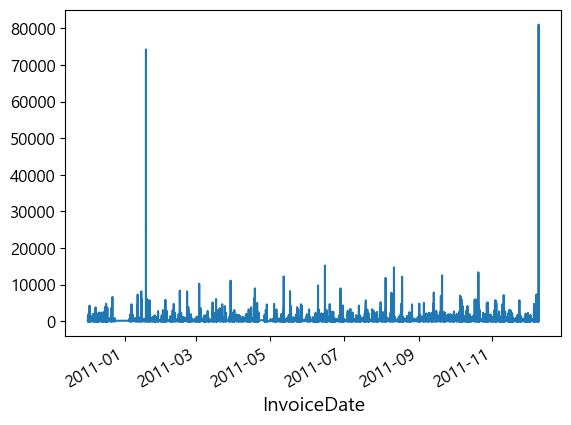

In [206]:
#일자별 거래 수량을 확인
data_quantity_series = df.groupby('InvoiceDate')['Quantity'].sum()
data_quantity_series.plot()

<Axes: xlabel='InvoiceDate'>

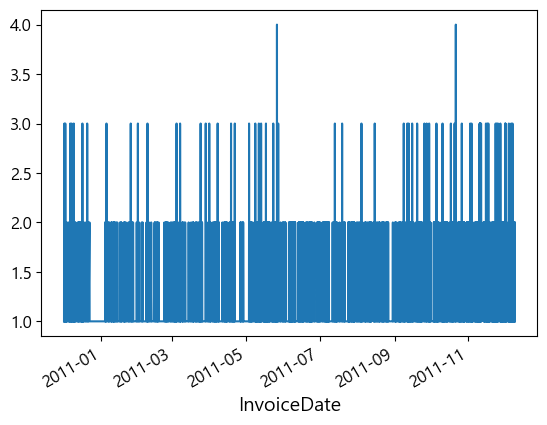

In [207]:
#일자별 거래 수량을 확인
data_transaction_series = df.groupby('InvoiceDate')['InvoiceNo'].nunique()
data_transaction_series.plot()

<Axes: xlabel='InvoiceDate'>

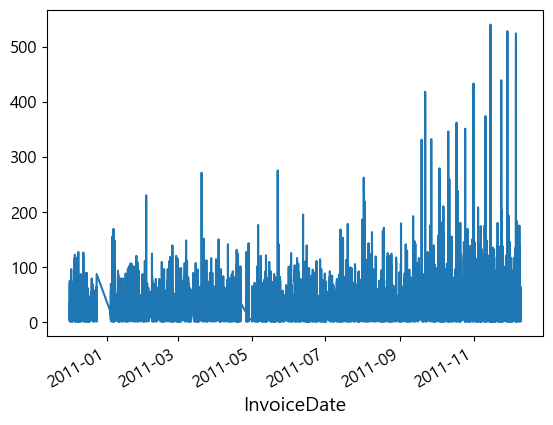

In [208]:
#일자별 거래 수량을 확인
data_unique_item_series = df.groupby('InvoiceDate')['StockCode'].nunique()
data_unique_item_series.plot()

<Axes: xlabel='date'>

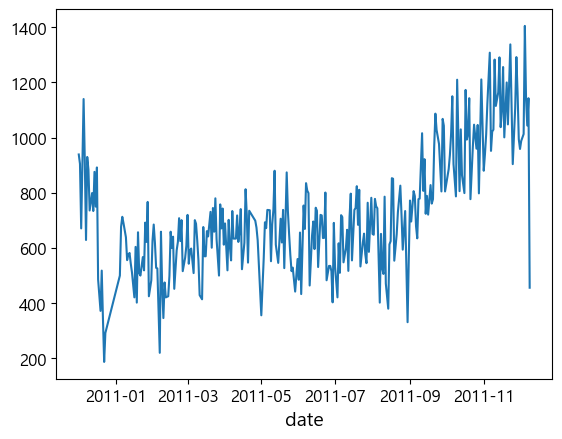

In [209]:
#일자별 거래 수량을 확인
df['date'] = df['InvoiceDate'].dt.date
data_unique_item_series = df.groupby('date')['StockCode'].nunique()
data_unique_item_series.plot()

In [210]:
print(df['date'].min())
print(df['date'].max())


2010-12-01
2011-12-09


<Axes: xlabel='date'>

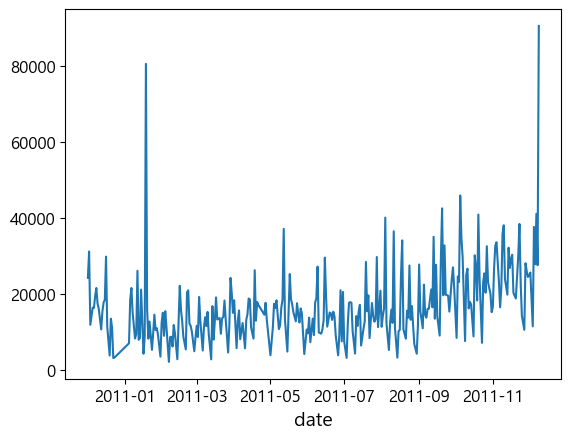

In [211]:
#날짜 별로 거래 수량의 합을 확인
date_quantity_series = df.groupby('date')['Quantity'].sum()
date_quantity_series.plot()

<Axes: xlabel='date'>

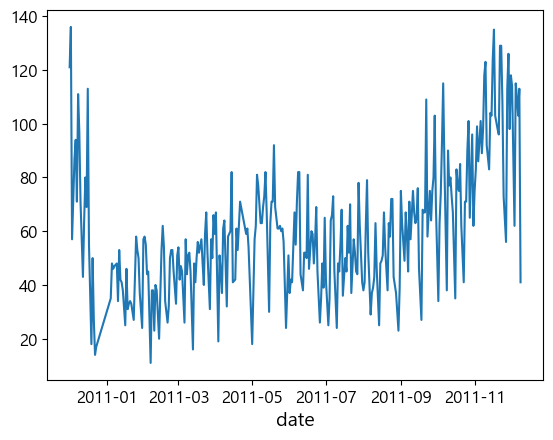

In [212]:
#날짜 별로 거래 횟수를 확인
date_transaction_series = df.groupby('date')['InvoiceNo'].nunique()
date_transaction_series.plot()

In [213]:
#유저 별 거래 횟수를 탐색
customer_unique_transaction_series = df.groupby('CustomerID')['InvoiceNo'].nunique()
customer_unique_transaction_series.describe()

count    4334.000000
mean        4.246654
std         7.642535
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: InvoiceNo, dtype: float64

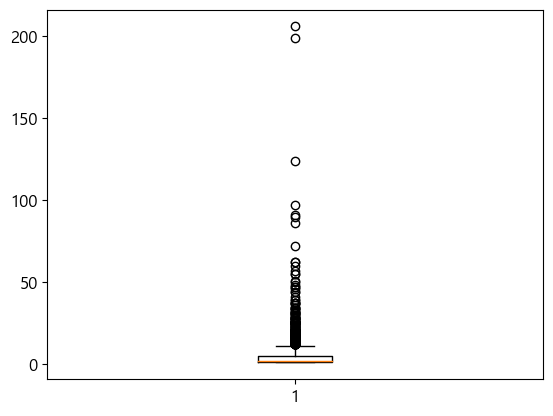

In [214]:
plt.boxplot(customer_unique_transaction_series.values)
plt.show()

In [215]:
#유저 별 아이템 종류 개수를 탐색
customer_unique_item_series = df.groupby('CustomerID')['StockCode'].nunique()
customer_unique_item_series.describe()

count    4334.000000
mean       61.432856
std        85.312937
min         1.000000
25%        16.000000
50%        35.000000
75%        77.000000
max      1786.000000
Name: StockCode, dtype: float64

In [216]:
#거래가 가장 많은 상품 TOP 10 탐색
df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending=False)[:10]

StockCode
85123A    1978
22423     1703
85099B    1600
47566     1379
84879     1375
20725     1289
22720     1146
23203     1080
20727     1052
22383     1043
Name: InvoiceNo, dtype: int64

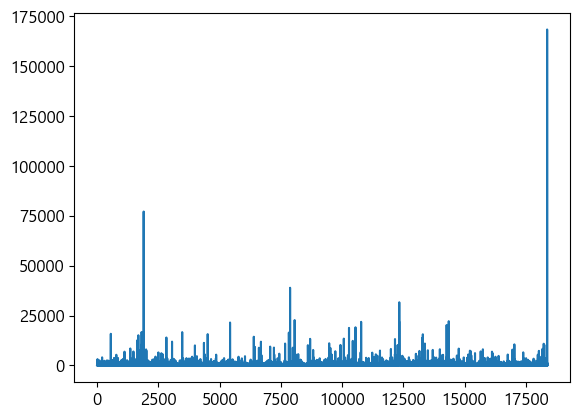

In [217]:
#파생 변수 생성 - 다른 속성을 가지고 계산이 가능한 필드를 추가
#관계형 데이터베이스 모델링에서는 이런 필드를 생성하지 말라고 하지만
#Customizing 과정에서는 자주 사용된다면 미리 만들어두는 것이 효율이 좋다라고 합니다.
df['amount'] = df['Quantity'] * df['UnitPrice']
plt.plot(df.groupby('InvoiceNo')['amount'].sum().values)

In [218]:
#데이터를 특정 시점으로 분리 - 2011년 11월 1일을 기준으로 분리
import datetime

df_year_round = df[df['date'] < datetime.date(2011, 11, 1)]
df_year_end = df[df['date'] >= datetime.date(2011, 11, 1)]
print(df_year_round.head())
print(df_year_end.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  ContainDigit  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom          True   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom          True   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom          True   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom          True   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom          True   

         date  amount  
0  2010-12-01   15.30  
1  2010-12-01   20.34  
2  2010-12-01   22.00  
3  2010-

In [219]:
#11월 이전 데이터에서 고객 아이디 별로 상품 ID를 하나씩만 존재하도록 수정
customer_item_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_round_set)

CustomerID
12346                                              {23166}
12347    {20719, 47580, 23421, 22492, 23308, 23146, 849...
12348    {22616, 22952, 84991, 23078, 21213, 21211, 230...
12350    {22348, 79066K, 22412, 22557, 21908, 22620, 21...
12352    {22413, 22635, 22645, 22064, 22701, 37448, 227...
                               ...                        
18280    {22727, 22180, 82484, 22467, 22499, 22725, 220...
18281    {23209, 22028, 23007, 22467, 22037, 22716, 23008}
18282    {21270, 22424, 21109, 23295, 21108, 22089, 23187}
18283    {22644, 82581, 21231, 22663, 22383, 20728, 207...
18287    {22866, 22644, 72351B, 22114, 85039B, 20963, 8...
Name: StockCode, Length: 3970, dtype: object


In [220]:
#11월 이전에 구매한 상품 코드를 이후에 구매한 상품 코드 와 구분을 하기 위해서 old를 추가
#고객 아이디별로 구매한 상품을 디셔너리로 만들 것인데 예전에 산 항목을 구분하기 위해서
#old를 값으로 추가

customer_item_dict = {}
for customer_id, stocks in customer_item_round_set.items():
    customer_item_dict[customer_id] = {}
    for stock in stocks:
        customer_item_dict[customer_id][stock] = 'old'
#데이터가 너무 많아서 한 번에 출력이 안되므로 데이터를 문자열로 변경해서 인덱싱 한 후 출력
print(str(customer_item_dict)[:100])

{'12346': {'23166': 'old'}, '12347': {'20719': 'old', '47580': 'old', '23421': 'old', '22492': 'old'


In [221]:
#11월 이후에 구매한 상품의 중복을 제거
customer_item_end_set = df_year_end.groupby('CustomerID')['StockCode'].apply(set)
#print(customer_item_end_set)

#11월 이전에만 구매한 상품은 old 11월 이후에만 구매한 상품은 new
#양쪽 다 구매한 것이면 both - 주기를 파악할 필요가 있습니다
for customer_id, stocks in customer_item_end_set.items():
    #customer_item_dict는 customer_id를 key로 가지고 구매한 상품을 dict로 가지고 있음
    #이 경우는 이전에 구매한 상품인지 확인이 필요
    if customer_id in customer_item_dict:
        for stock in stocks:
            if stock in customer_item_dict[customer_id]:
                customer_item_dict[customer_id][stock] = 'both'
            else:
                customer_item_dict[customer_id][stock] = 'new'
    
    #이 경우는 이전에 구매한 상품인지 확인할 필요가 없습니다.
    else:
        customer_item_dict[customer_id] = {}
        for stock in stocks:
            customer_item_dict[customer_id][stock] = 'new'

print(str(customer_item_dict)[:100])








{'12346': {'23166': 'old'}, '12347': {'20719': 'both', '47580': 'old', '23421': 'old', '22492': 'old


In [222]:
#고객 별로 old 와 new 와 both의 개수를 파악
columns = ['CustomerID', 'old', 'new', 'both']
df_order_info = pd.DataFrame(columns=columns)
for customer_id in customer_item_dict:
    old = 0
    new = 0
    both = 0
    
    for stock_code in customer_item_dict[customer_id]:
        status = customer_item_dict[customer_id][stock_code]
        if status == 'old':
            old = old + 1
        elif status == 'new':
            new = new + 1
        else:
            both = both + 1
            
    #DataFrame에 개수를 추가
    row = [customer_id, old, new, both]
    series = pd.Series(row, index=columns)
    df_order_info = df_order_info.append(series, ignore_index=True)

    

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4628\416941206.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order

In [223]:
print(df_order_info.head())

  CustomerID old new both
0      12346   1   0    0
1      12347  92   3    8
2      12348  21   0    0
3      12350  16   0    0
4      12352  43  12    2


In [224]:
#전체 유저 수
print(df_order_info.shape[0])

#11월 이후에 새로운 상품을 구매한 유저 수
print(df_order_info[(df_order_info['old'] > 0) & (df_order_info['new'] > 0)].shape[0])

#동일한 제품을 재구매한 고객 수 - 이 고객들은 구매 주기를 확인해볼 필요가 있음
#식료품이라면 미리 알림을 주는 것도 좋은 마케팅 방법 중 하나
#동일한 식료품이지만 품질이 더 좋거나 싼 제품을 추천하기도 함
print(df_order_info[df_order_info['both'] > 0].shape[0])

4334
1446
1426


In [225]:
#11월 이후에 어떤 상품을 새로 구매를 많이 했는지 확인
#각 년도별 월 단위도 체크를 해야 합니다.
#이전 몇 개월 동안 구매하지 않다가 특정 월 이후에 구매하는 경우는 계절성 상품
df_order_info['new'].value_counts()

0      2521
1        81
3        73
2        72
8        65
       ... 
116       1
157       1
124       1
130       1
99        1
Name: new, Length: 133, dtype: int64

In [226]:
#유저의 수 와 상품의 수 파악
print(len(df_year_round['CustomerID'].unique()))
print(len(df_year_round['StockCode'].unique()))

3970
3608


In [227]:
#추천 시스템을 만들 때는 유저 와 상품 그리고 평점이 존재해야 합니다.
#소핑몰에서는 평점 대신에 구매 횟수를 사용하기도 합니다.
uir_df = df_year_round.groupby(['CustomerID', 'StockCode'])['InvoiceNo'].nunique().reset_index()
print(uir_df.head())

  CustomerID StockCode  InvoiceNo
0      12346     23166          1
1      12347     16008          1
2      12347     17021          1
3      12347     20665          1
4      12347     20719          3


array([[<Axes: title={'center': 'InvoiceNo'}>]], dtype=object)

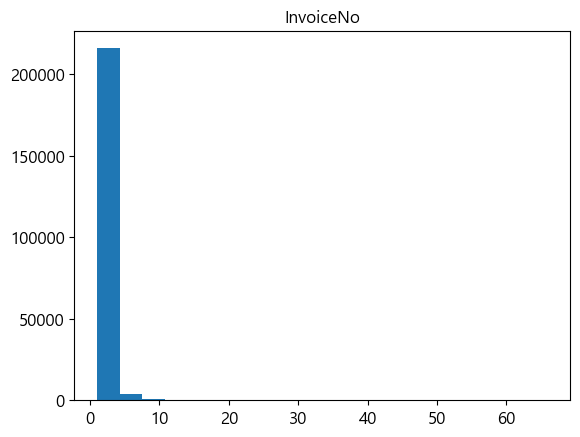

In [228]:
#분포 확인 - 구매는 1번이 경우가 아주 많음
#예측을 할 때 타겟은 정규 분포인 경우가 가장 잘 하게 됩니다.
#타겟값의 편차가 너무 크거나 한쪽에 쏠린 경우 로그 변환 등을 수행
uir_df.hist(bins=20, grid=False)

<Axes: >

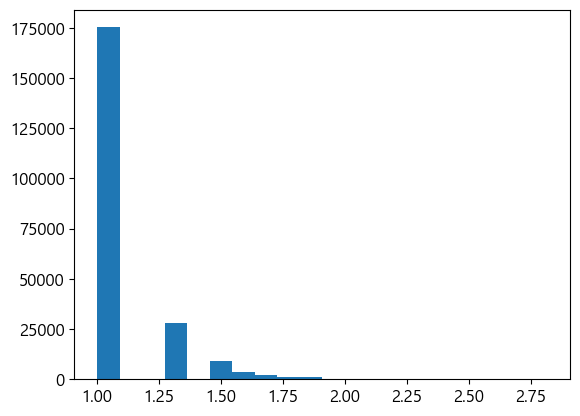

In [229]:
#로그 변환 수행
uir_df['InvoiceNo'].apply(lambda x:np.log10(x) + 1).hist(bins=20, grid=False)

In [230]:
uir_df['Rating'] = uir_df['InvoiceNo'].apply(lambda x:np.log10(x) + 1)
uir_df['Rating'] = ((uir_df['Rating'] - uir_df['Rating'].min()) / (uir_df['Rating'].max() - uir_df['Rating'].min()) * 4) + 1


In [231]:
#추천 알고리즘이 사용할 데이터 생성
uir_df = uir_df[['CustomerID', 'StockCode', 'Rating']]
print(uir_df.head())

  CustomerID StockCode    Rating
0      12346     23166  1.000000
1      12347     16008  1.000000
2      12347     17021  1.000000
3      12347     20665  1.000000
4      12347     20719  2.048881


In [233]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

In [237]:
train_start = time.time()
#n_factors는 요인의 수로 기본값은 100
#lr_all은 학습률
#reg_all: 정규화 항으로 클수록 파라미터를 작게 추정하는데 기본값은 0.02
#n_epochs: 수행 횟수
model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=200)
model.fit(train_data)
train_end = time.time()
print("훈련 시간:", (train_end - train_start))

훈련 시간: 11.658727407455444


In [238]:
predictions = model.test(test_data)
print(accuracy.rmse(predictions))

RMSE: 0.3357
0.33574003641989775


[Prediction(uid='15298', iid='22645', r_ui=1.0, est=1.4130916188844709, details={'was_impossible': F


In [242]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)
#전체 데이터를 가지고 훈련
train_data = data.build_full_trainset()
train_start = time.time()
#n_factors는 요인의 수로 기본값은 100
#lr_all은 학습률
#reg_all: 정규화 항으로 클수록 파라미터를 작게 추정하는데 기본값은 0.02
#n_epochs: 수행 횟수
model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=200)
model.fit(train_data)
train_end = time.time()
print("훈련 시간:", (train_end - train_start))

훈련 시간: 6.179501295089722


In [243]:
#이전에 구매하지 않았던 항목을 가지고 예측
test_data = train_data.build_anti_testset()
target_user_predictions = model.test(test_data)
print(target_user_predictions)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [244]:
#구매 예측 결과를 디셔너리로 변환해서 보기 좋게 출력
new_order_prediction_dict = {}
for customer_id, stock_code , _, predicted_rating, _ in target_user_predictions:
    if customer_id in new_order_prediction_dict:
        if stock_code in new_order_prediction_dict[customer_id]:
            pass
        else:
            new_order_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        new_order_prediction_dict[customer_id] = {}
        new_order_prediction_dict[customer_id][stock_code] = predicted_rating
        
print(str(new_order_prediction_dict)[:300] + "...")

{'12346': {'16008': 1, '17021': 1.2250084255426996, '20665': 1.0416122257187341, '20719': 1.337540274675815, '20780': 1.0408033220959783, '20782': 1.1571596861690114, '20966': 1.044371528575423, '21035': 1.0788301467921317, '21041': 1.0405440820235077, '21064': 1.1959246467038178, '21154': 1.1037006...


In [245]:
#이전에 구매했던 항목을 가지고 예측
test_data = train_data.build_testset()
target_user_predictions = model.test(test_data)
#print(target_user_predictions)

#구매 예측 결과를 디셔너리로 변환해서 보기 좋게 출력
reorder_prediction_dict = {}
for customer_id, stock_code , _, predicted_rating, _ in target_user_predictions:
    if customer_id in reorder_prediction_dict:
        if stock_code in reorder_prediction_dict[customer_id]:
            pass
        else:
            reorder_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        reorder_prediction_dict[customer_id] = {}
        reorder_prediction_dict[customer_id][stock_code] = predicted_rating
        
print(str(reorder_prediction_dict)[:300] + "...")

{'12346': {'23166': 1.028802717634506}, '12347': {'16008': 1.0167919001852874, '17021': 1.2184587331380794, '20665': 1.1412044322191808, '20719': 1.7355655470181732, '20780': 1.293138420919368, '20782': 1.3522151950231311, '20966': 1.472260775208959, '21035': 1.3733336580989655, '21041': 1.421604904...
